# Advance Regression Assignment - Lasso

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### Reading and Understanding the Data

Let's import the libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Working on the missing values in columns

In [5]:
data[['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

Some Categorical values 'NA' got read as null in panda dataframe for such column, planning to replace null value with different value.
Ex:-
Alley column NA - No alley access -> change the value to 'NoAlley'.

In [6]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [7]:
data['Alley'].fillna(value='NoAlley', inplace=True)

In [8]:
data['Alley'].value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [9]:
data['PoolQC'].fillna(value='NoPool', inplace=True)
data['FireplaceQu'].fillna(value='NoFirePlc', inplace=True)
data['Fence'].fillna(value='NoFence', inplace=True)
data['MiscFeature'].fillna(value='NoMISC', inplace=True)

In [10]:
data['MasVnrType'].fillna(value='NoMasVnr', inplace=True)
data['MasVnrArea'].fillna(value='0', inplace=True)

In [11]:
data['BsmtQual'].fillna(value='NoBase', inplace=True)
data['BsmtCond'].fillna(value='NoBase', inplace=True)
data['BsmtExposure'].fillna(value='NoBase', inplace=True)
data['BsmtFinType1'].fillna(value='NoBase', inplace=True)
data['BsmtFinType2'].fillna(value='NoBase', inplace=True)

In [12]:
data['GarageType'].fillna(value='NoGarage', inplace=True)
data['GarageYrBlt'].fillna(value=0, inplace=True)
data['GarageFinish'].fillna(value='NoGarage', inplace=True)
data['GarageQual'].fillna(value='NoGarage', inplace=True)
data['GarageCond'].fillna(value='NoGarage', inplace=True)

The property details which has NA value in Electrical column was built on the year 2006, so we took the 'SBrkr' value since most property which built on 2006 has value as 'SBrkr' in Electrical column

In [13]:
data['Electrical'].fillna(value='SBrkr', inplace=True)

In [14]:
mode_val=float(data['LotFrontage'].mode())

In [15]:
print(mode_val)
print(type(mode_val))

60.0
<class 'float'>


In [16]:
data['LotFrontage'].fillna(value=mode_val, inplace=True)
data['LotFrontage'] = pd.to_numeric(data['LotFrontage'], errors='coerce')

In [17]:
data[['LotFrontage','Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   Alley         1460 non-null   object 
 2   MasVnrType    1460 non-null   object 
 3   MasVnrArea    1460 non-null   object 
 4   BsmtQual      1460 non-null   object 
 5   BsmtCond      1460 non-null   object 
 6   BsmtExposure  1460 non-null   object 
 7   BsmtFinType1  1460 non-null   object 
 8   BsmtFinType2  1460 non-null   object 
 9   Electrical    1460 non-null   object 
 10  FireplaceQu   1460 non-null   object 
 11  GarageType    1460 non-null   object 
 12  GarageYrBlt   1460 non-null   float64
 13  GarageFinish  1460 non-null   object 
 14  GarageQual    1460 non-null   object 
 15  GarageCond    1460 non-null   object 
 16  PoolQC        1460 non-null   object 
 17  Fence         1460 non-null   object 
 18  MiscFeature   1460 non-null 

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print(len(categorical_cols))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
44


In [20]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist() 
print(num_cols)
print(len(num_cols))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
37


In [21]:
for col in categorical_cols:
    print(col,' ##### ',data[col].unique())

MSZoning  #####  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  #####  ['Pave' 'Grvl']
Alley  #####  ['NoAlley' 'Grvl' 'Pave']
LotShape  #####  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  #####  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  #####  ['AllPub' 'NoSeWa']
LotConfig  #####  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  #####  ['Gtl' 'Mod' 'Sev']
Neighborhood  #####  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  #####  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  #####  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  #####  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  #####  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle  #####  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
R

In [22]:
# convert data type as float
data['MasVnrArea'] = pd.to_numeric(data['MasVnrArea'], errors='coerce')

#convert below fields as object as per data dictionary
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')


categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print(len(categorical_cols))

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
46


In [23]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist() 
print(num_cols)
print(len(num_cols))

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
35


In [24]:
#remove the Id column
num_cols.remove('Id')
data.drop(columns=['Id'],inplace=True)

### Preprocessing

In [25]:
data[num_cols].describe()

LotFrontage        LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000   1460.000000  1460.000000   
mean     68.267123   10516.828082  1971.267808   1984.865753   103.117123   
std      22.356355    9981.264932    30.202904     20.645407   180.731373   
min      21.000000    1300.000000  1872.000000   1950.000000     0.000000   
25%      60.000000    7553.500000  1954.000000   1967.000000     0.000000   
50%      63.000000    9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000   11601.500000  2000.000000   2004.000000   164.250000   
max     313.000000  215245.000000  2010.000000   2010.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 34 columns]

### visualising numeric values

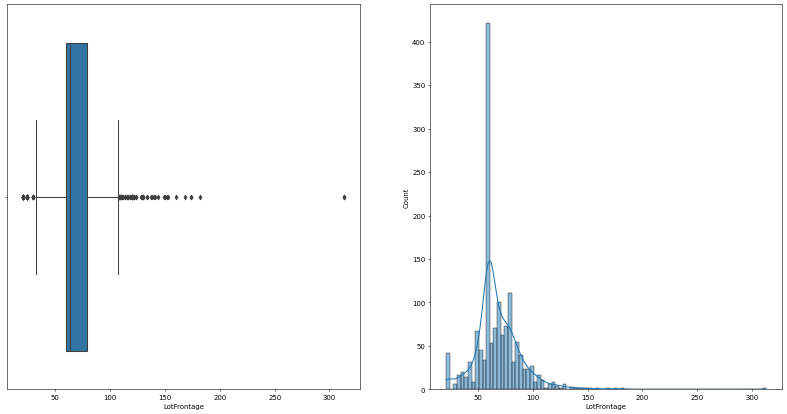

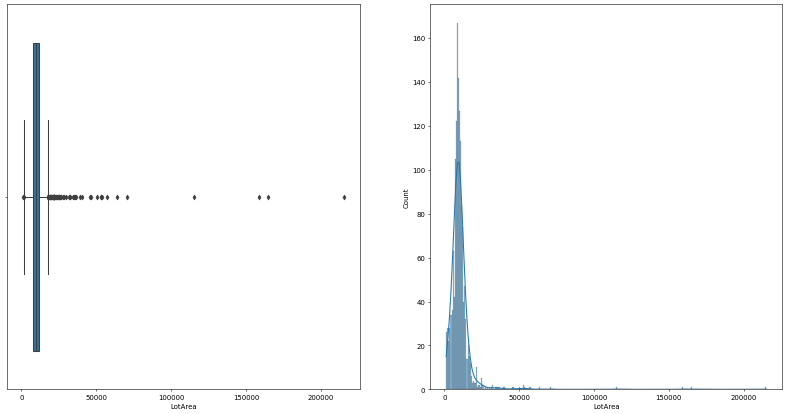

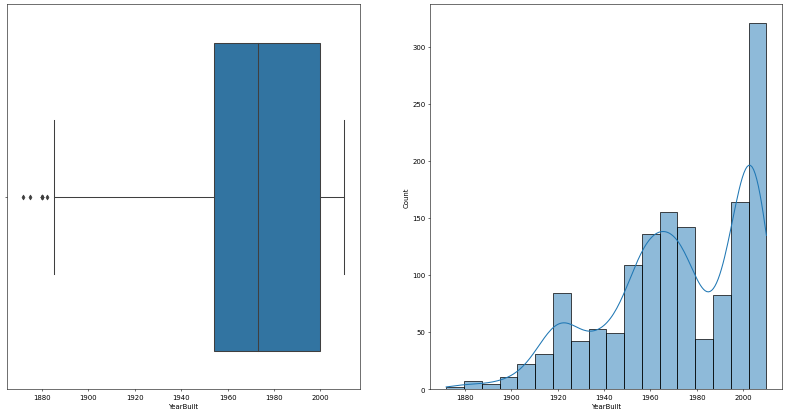

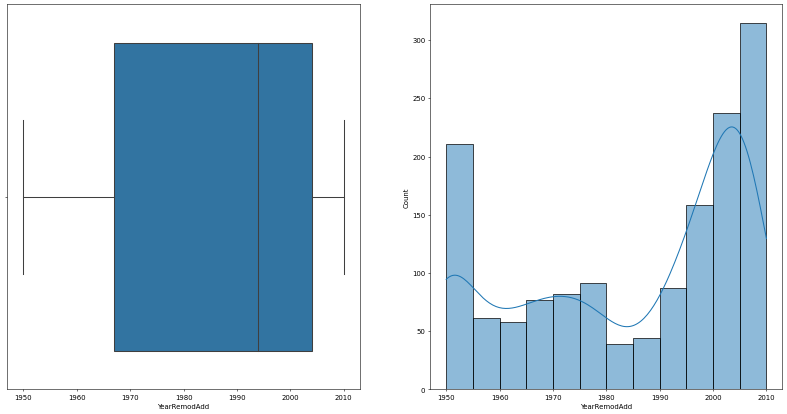

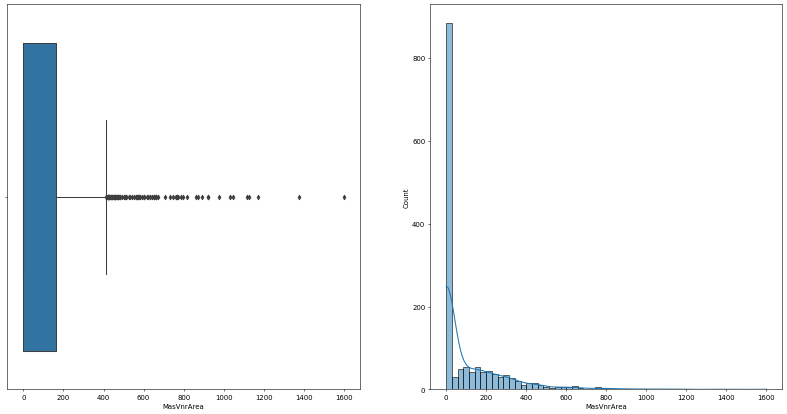

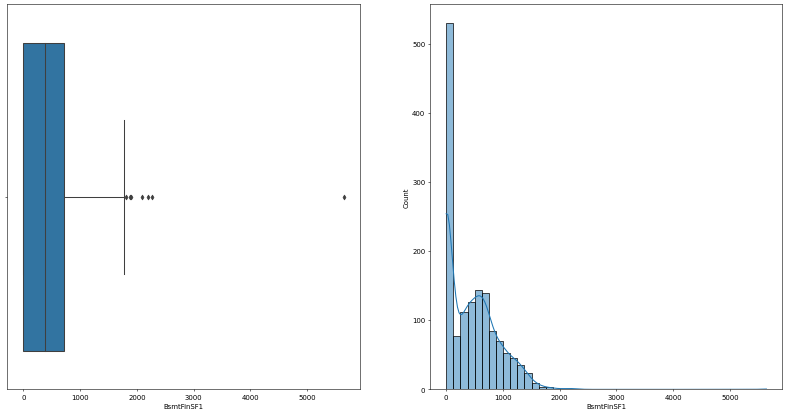

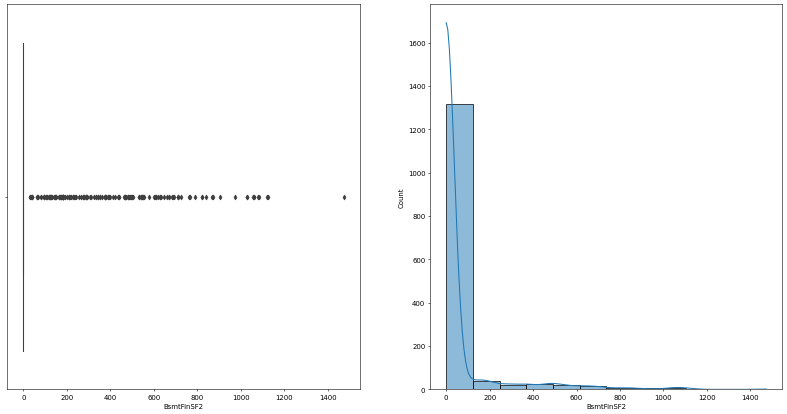

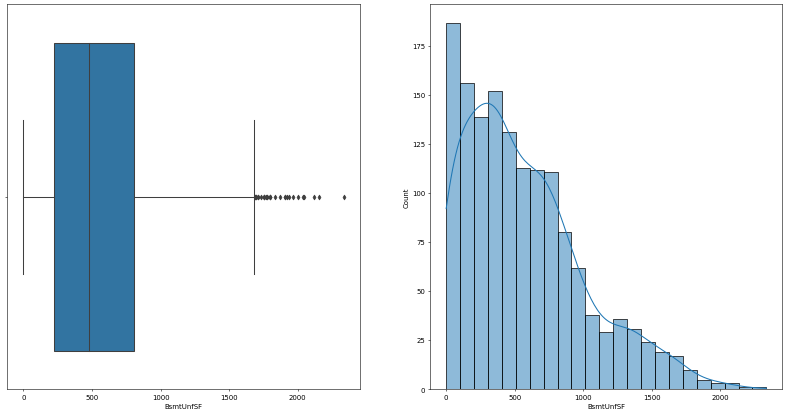

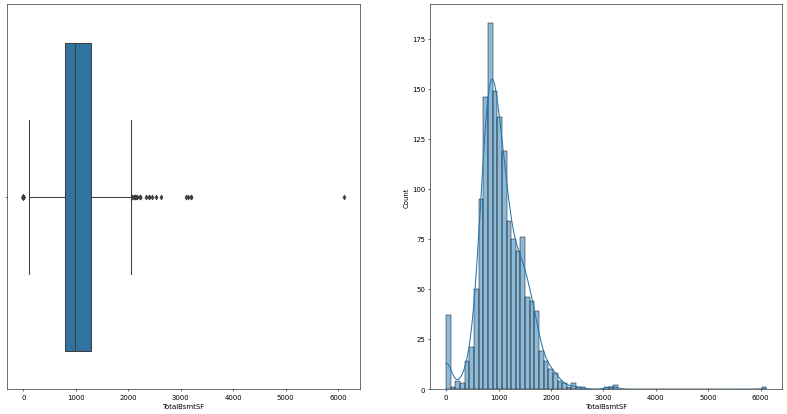

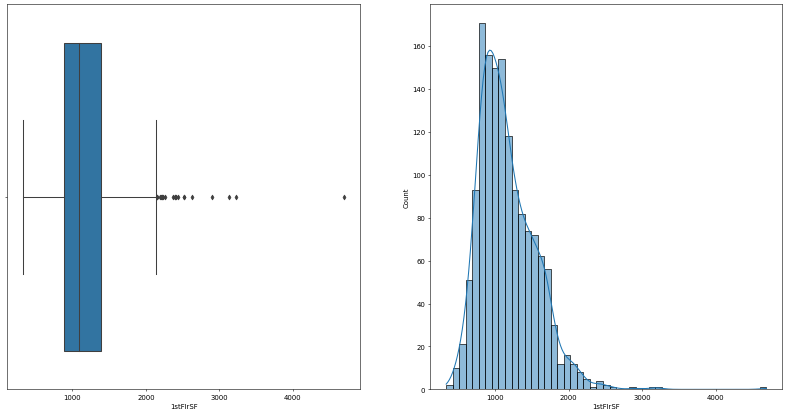

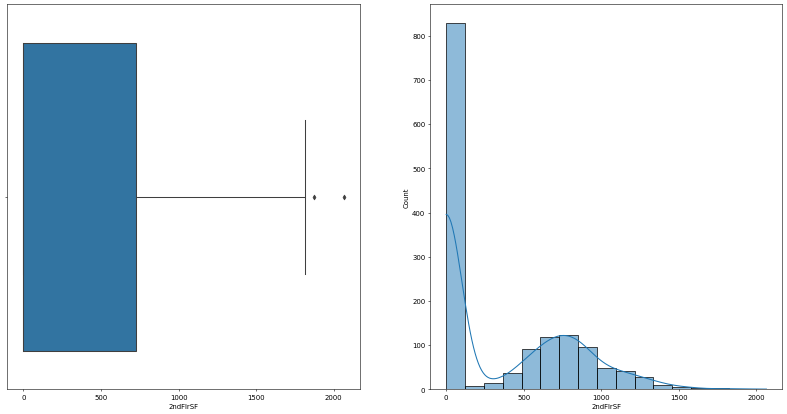

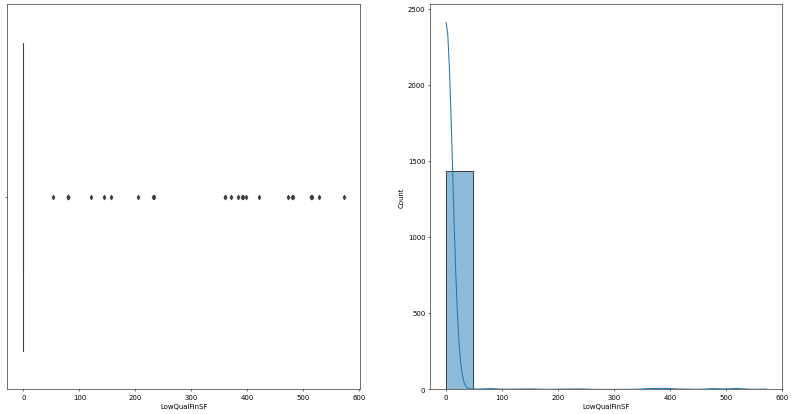

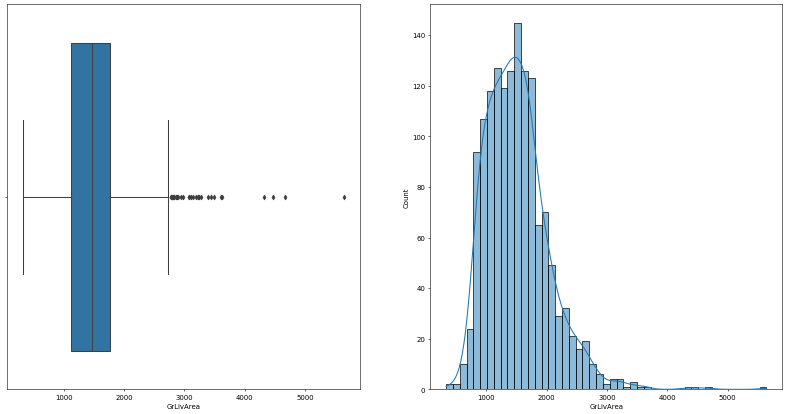

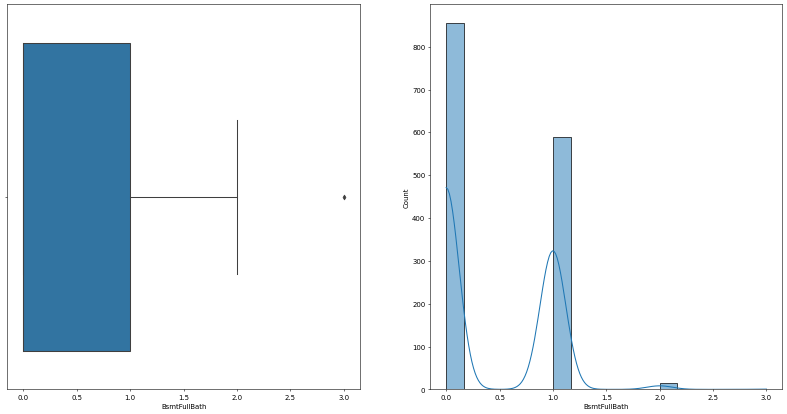

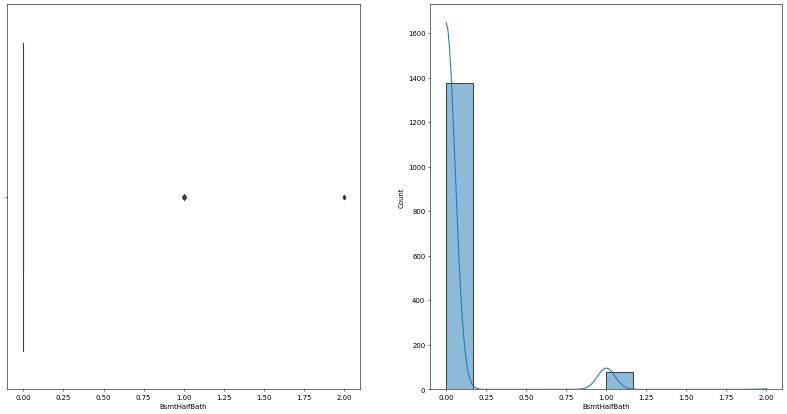

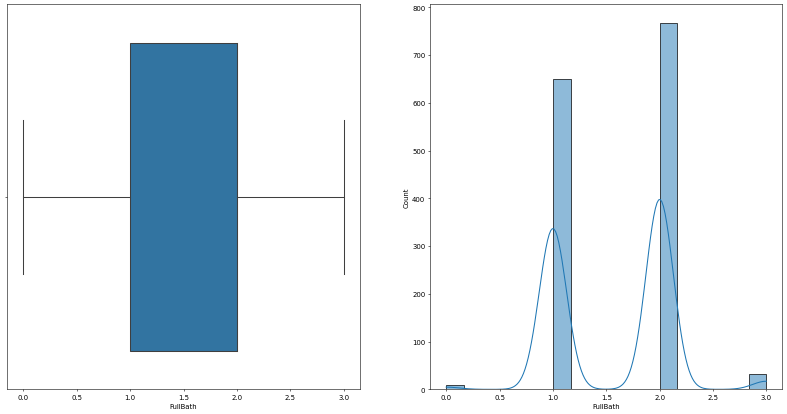

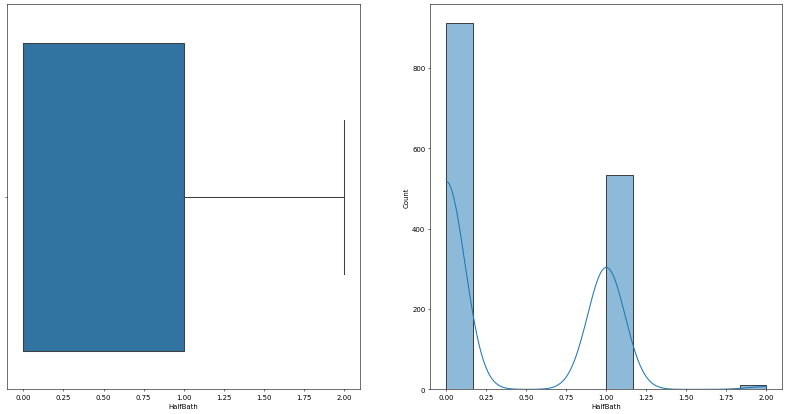

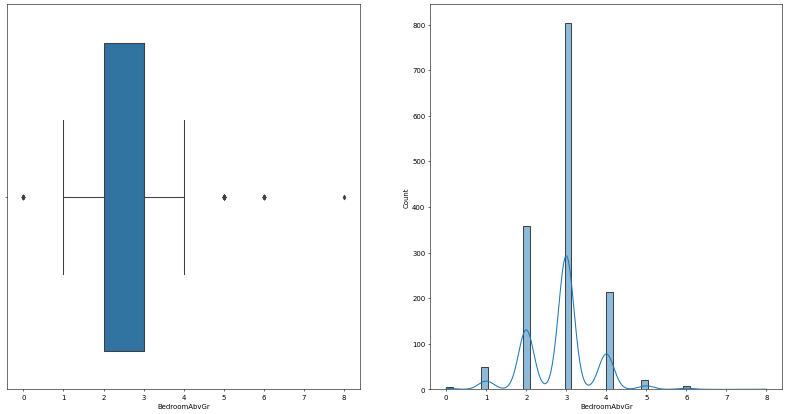

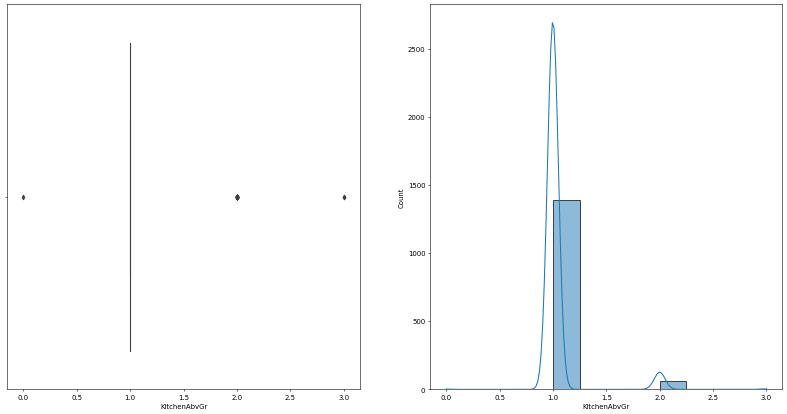

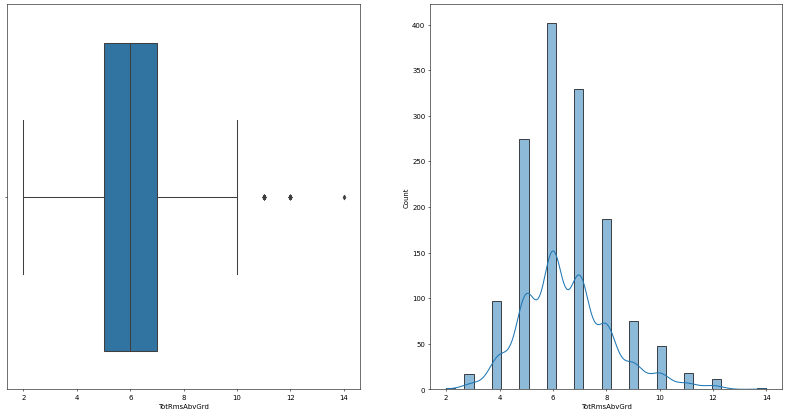

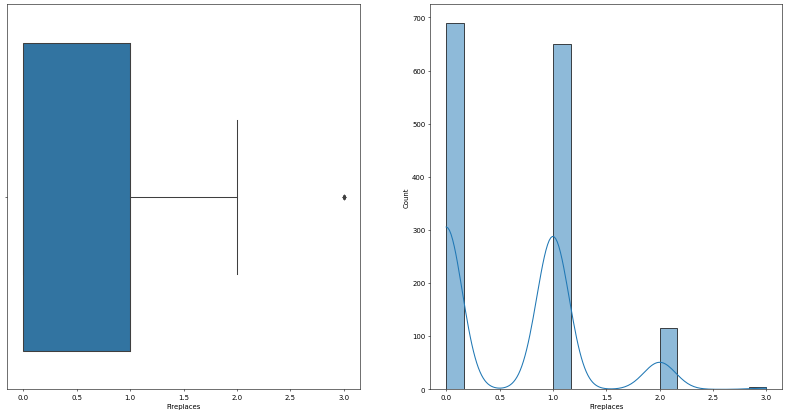

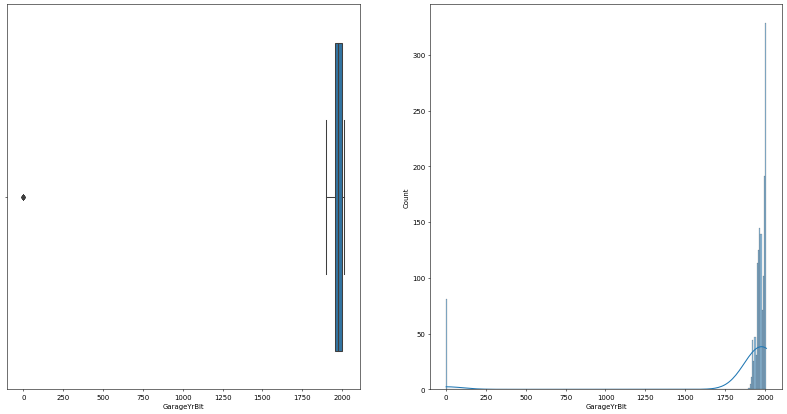

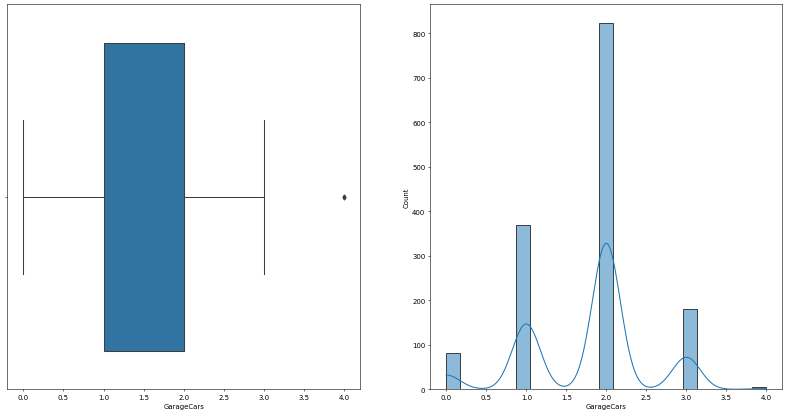

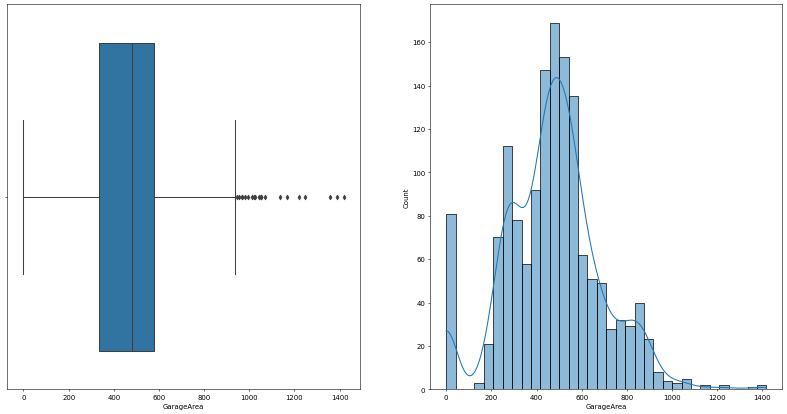

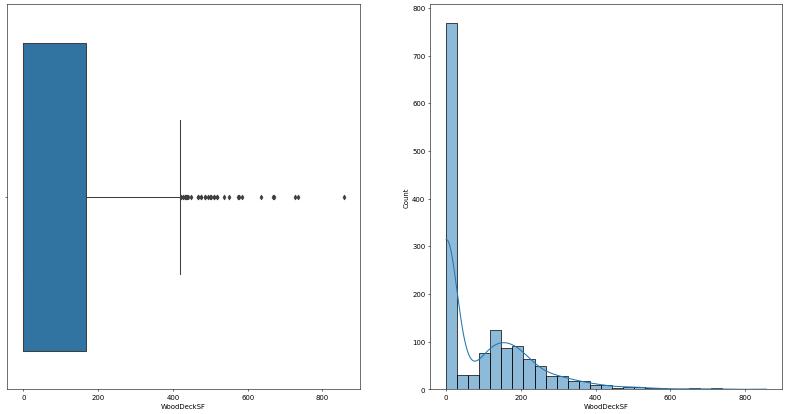

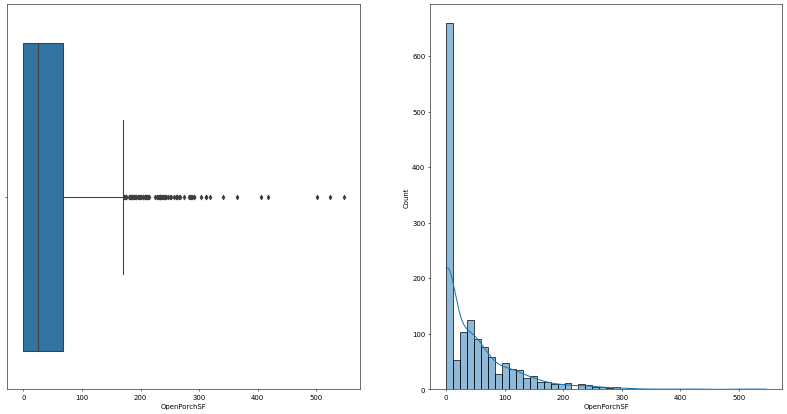

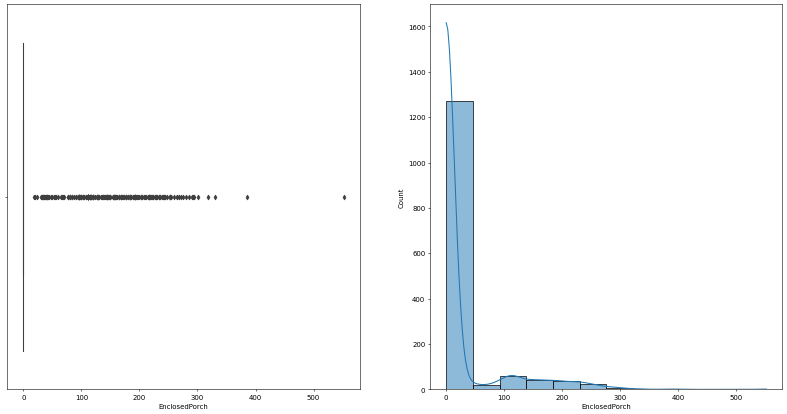

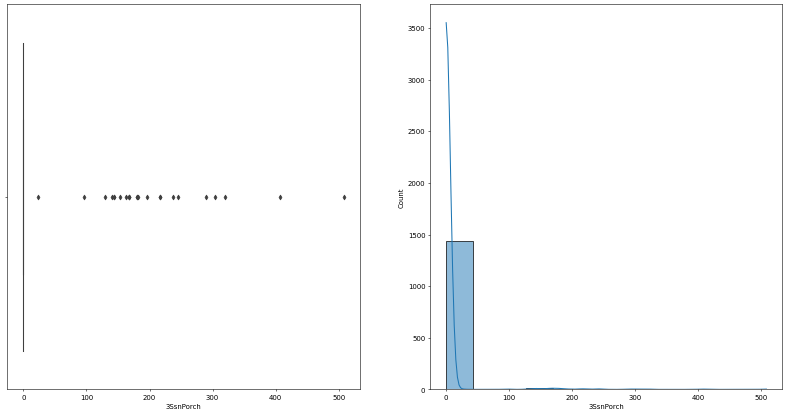

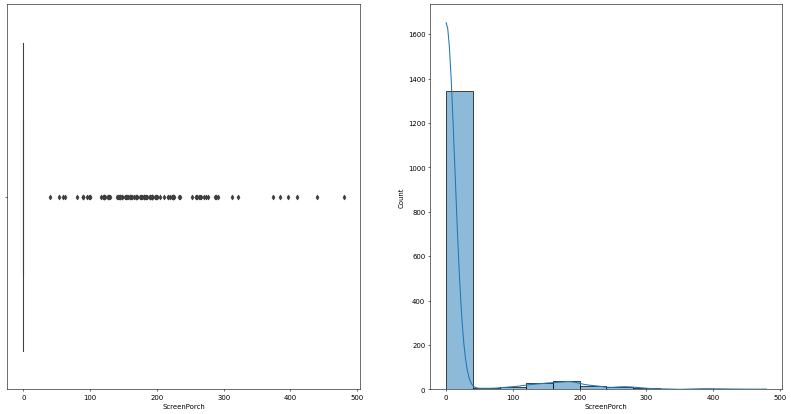

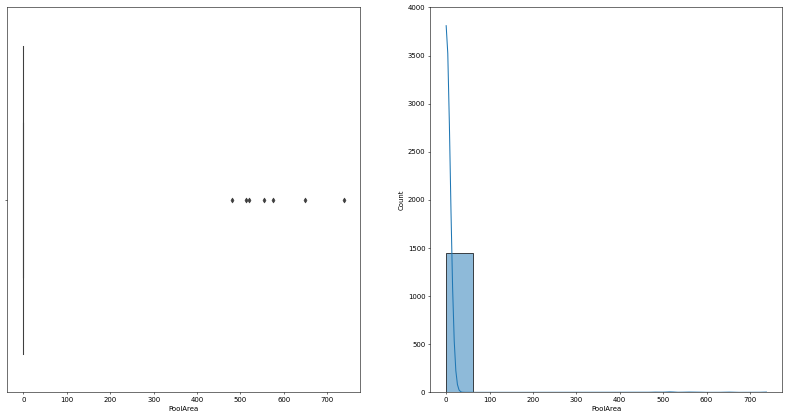

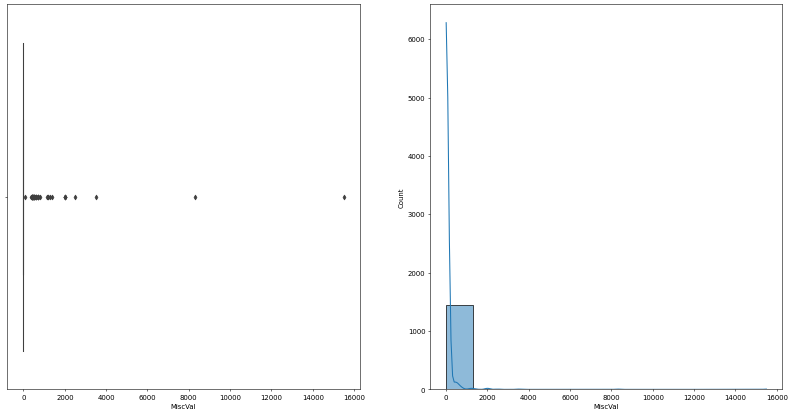

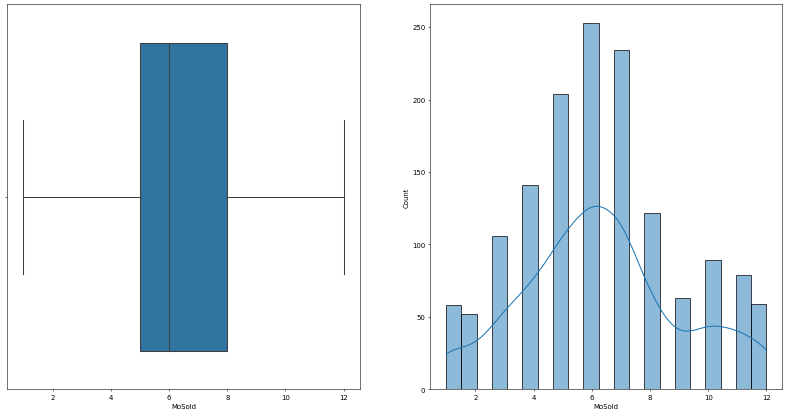

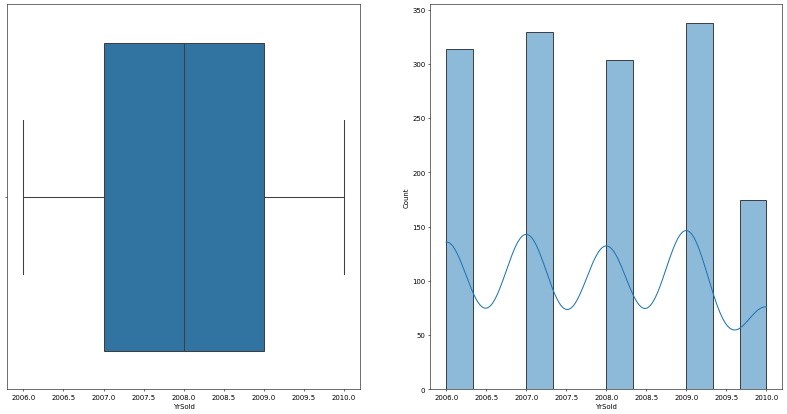

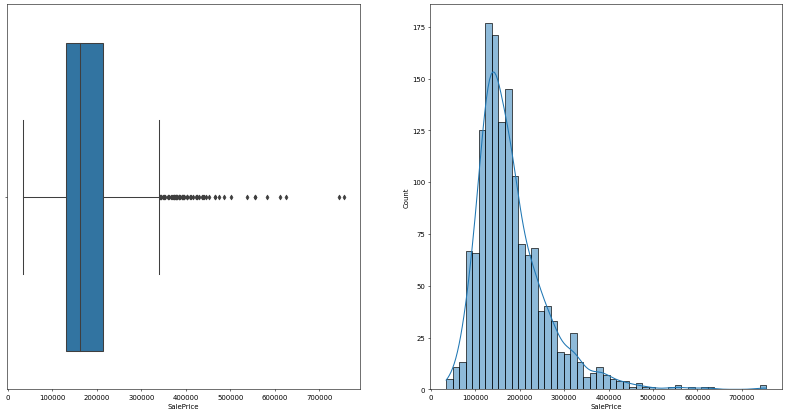

In [26]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
    sns.boxplot(ax=axes[0], x=data[col]);
    sns.histplot(ax=axes[1], x=data[col],kde=True);

### Bi-variant analysis

In [27]:
data_num=data[num_cols]
plt.figure(figsize = (100, 100))
sns.heatmap(data_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Treating Outliers 

In [28]:
for col in num_cols:
    data[col][data[col] <= data[col].quantile(0.05)] = data[col].quantile(0.05)
    data[col][data[col] >= data[col].quantile(0.95)] = data[col].quantile(0.95)

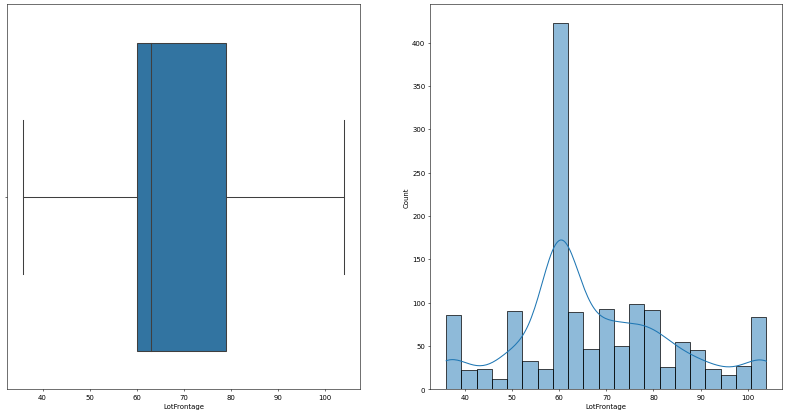

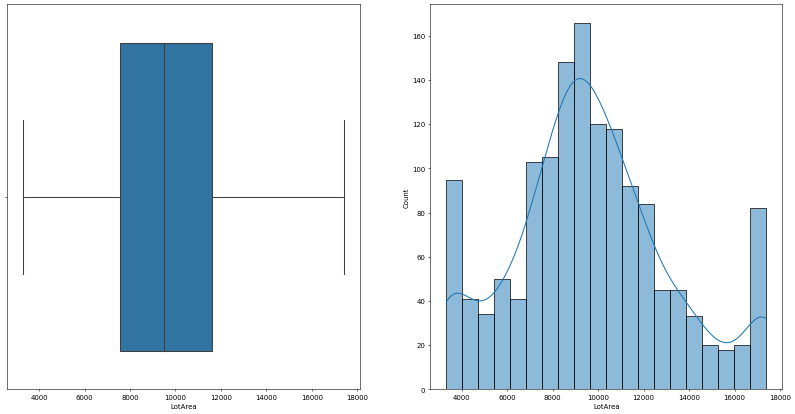

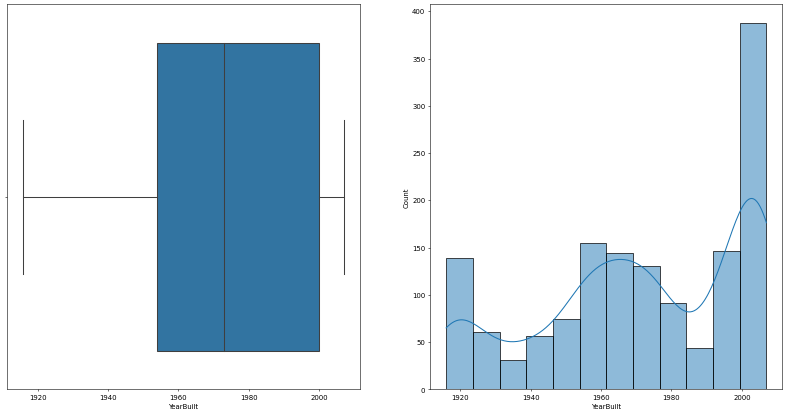

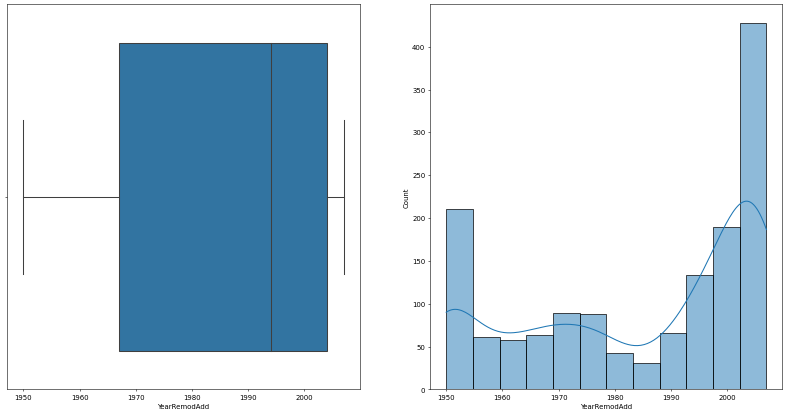

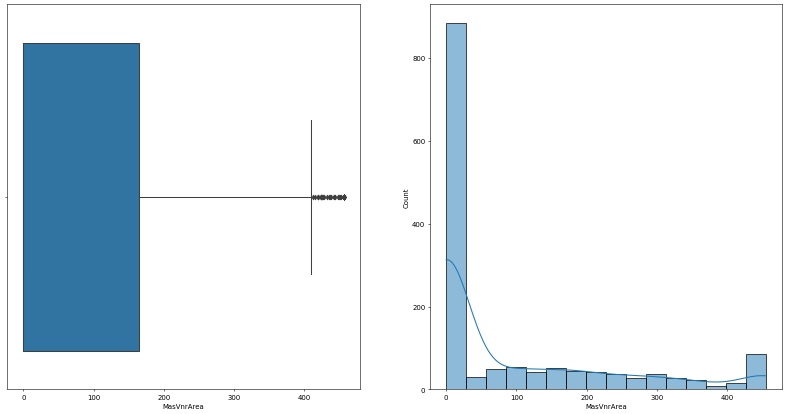

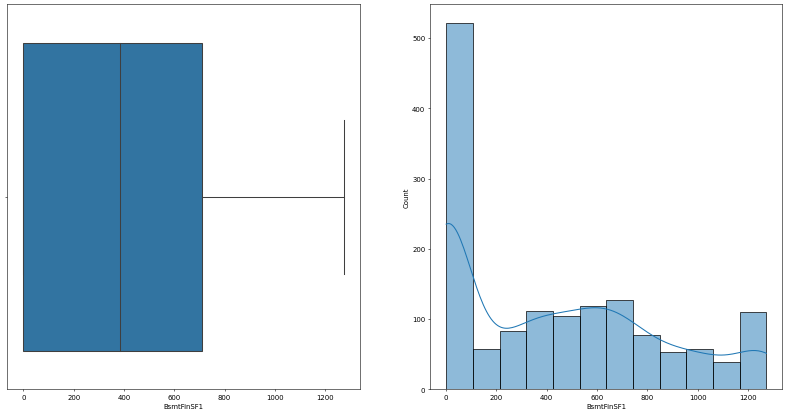

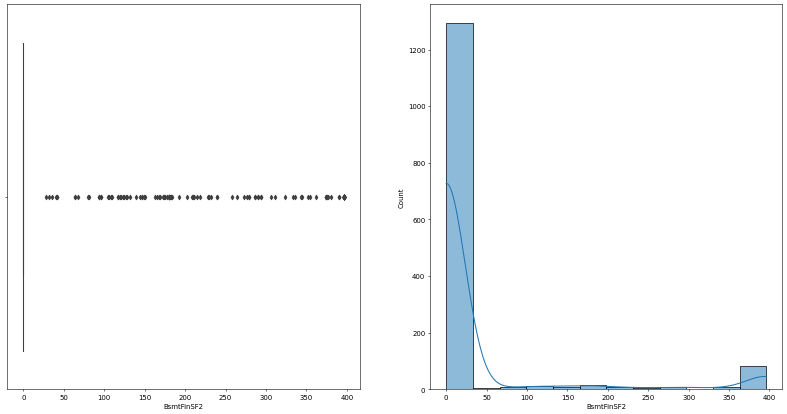

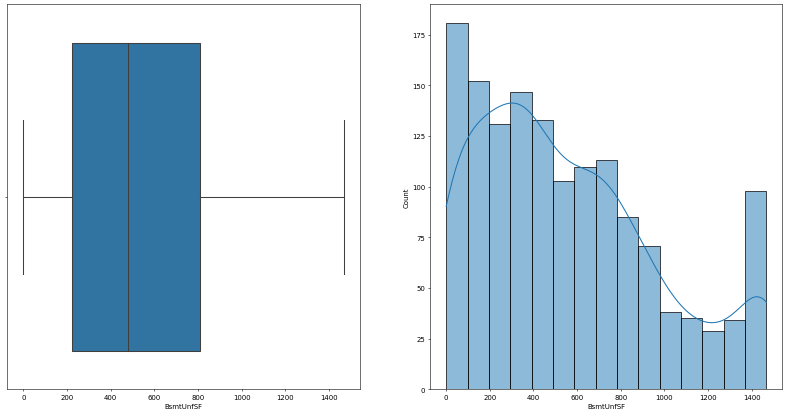

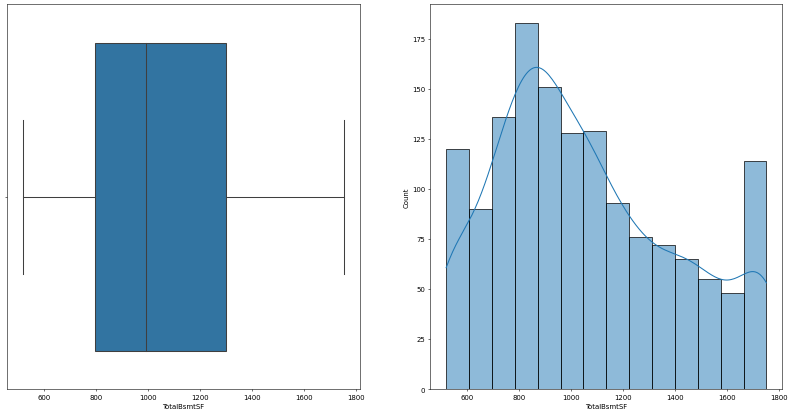

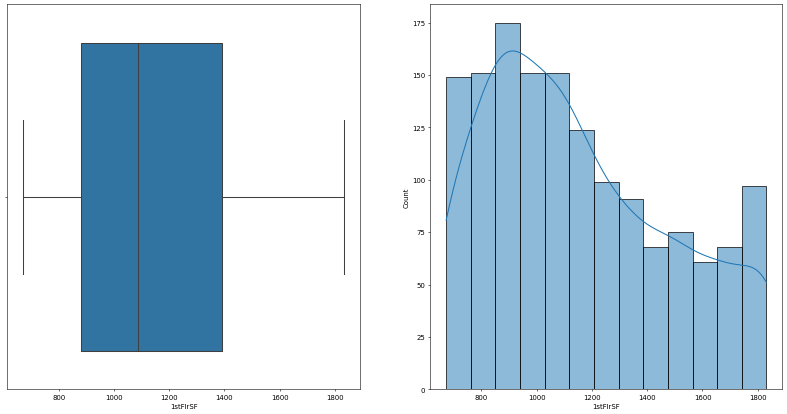

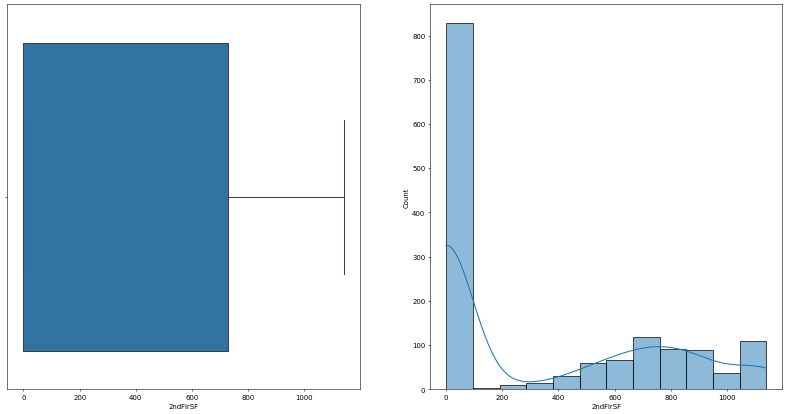

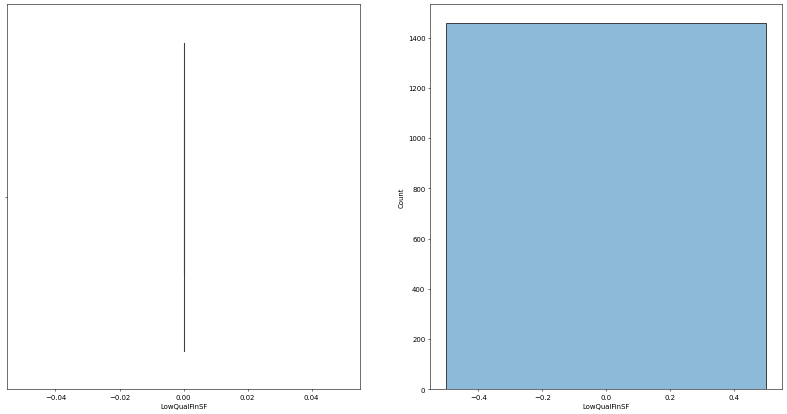

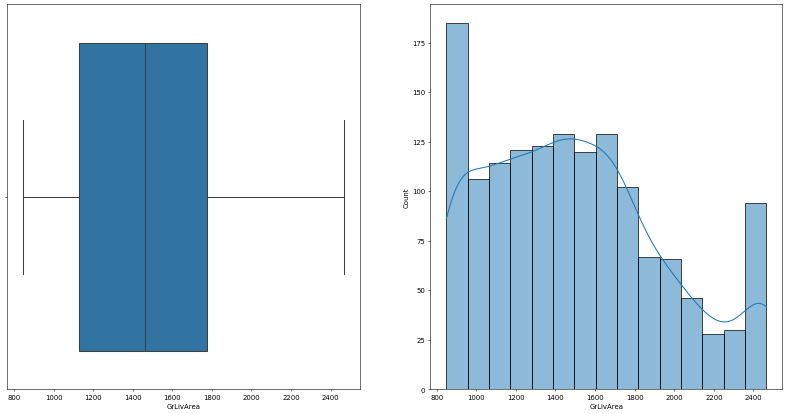

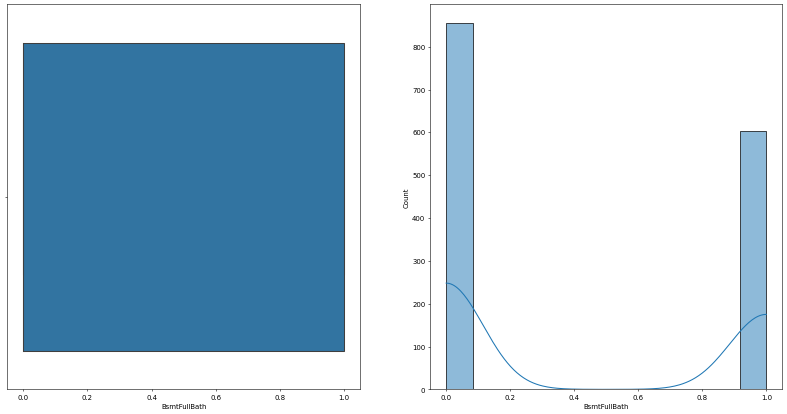

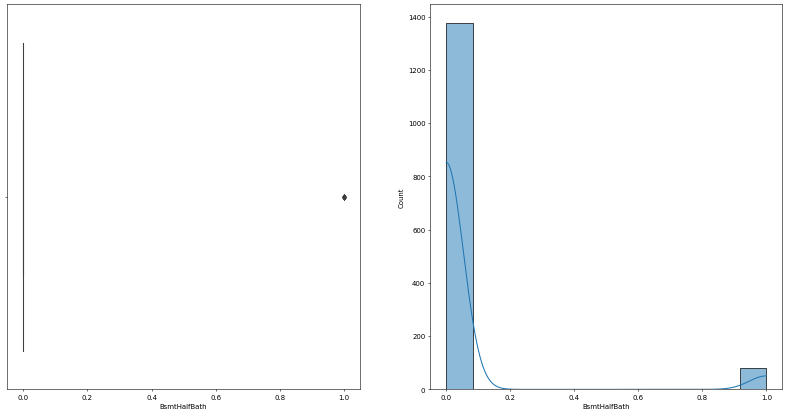

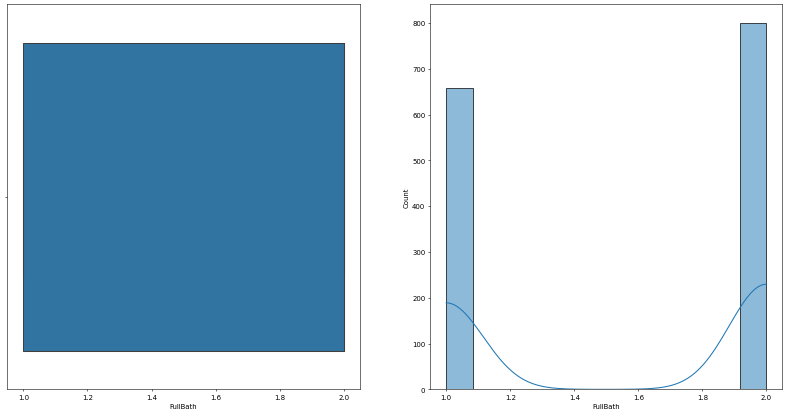

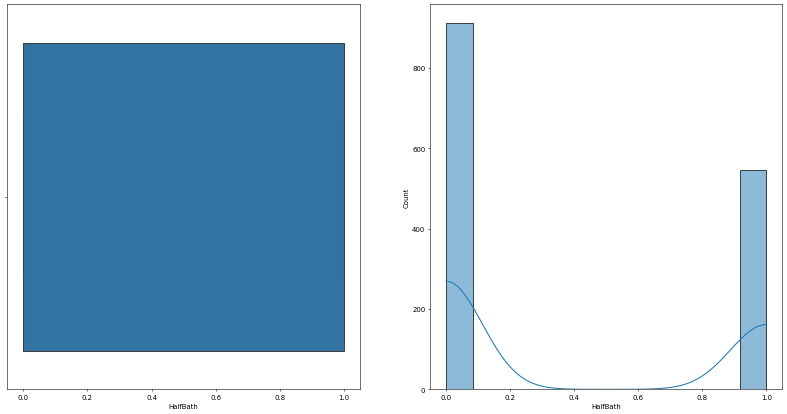

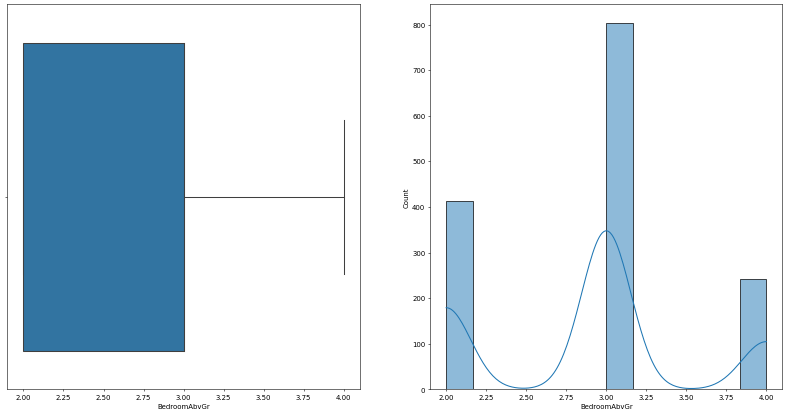

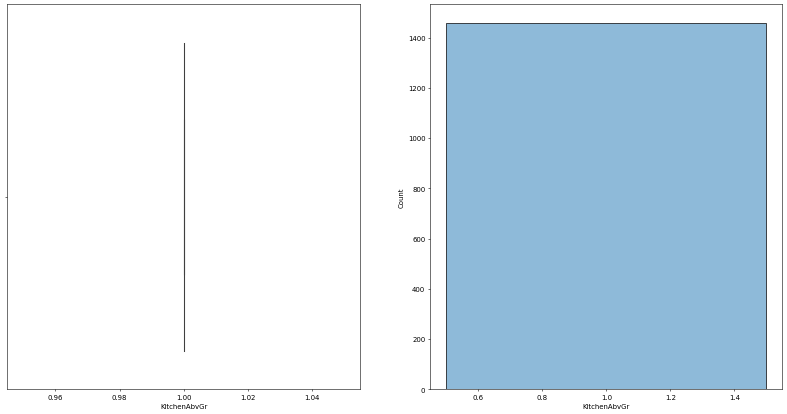

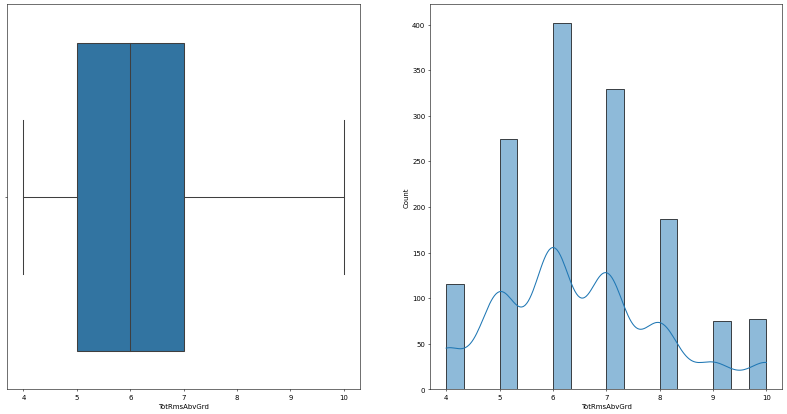

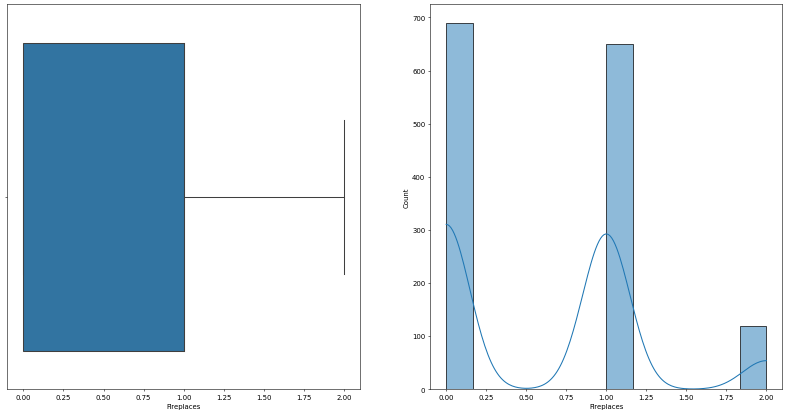

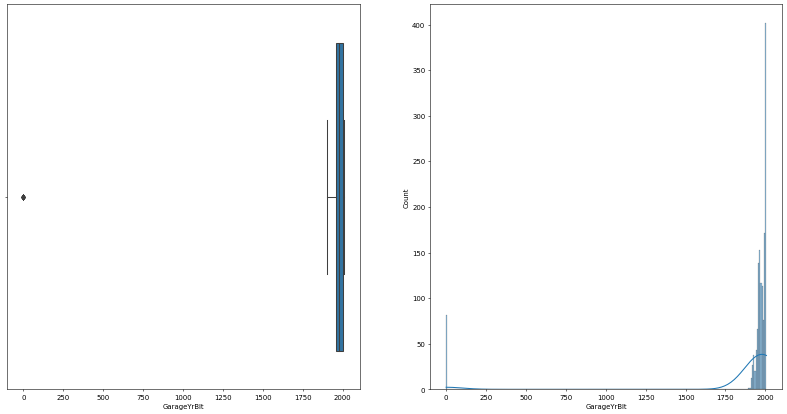

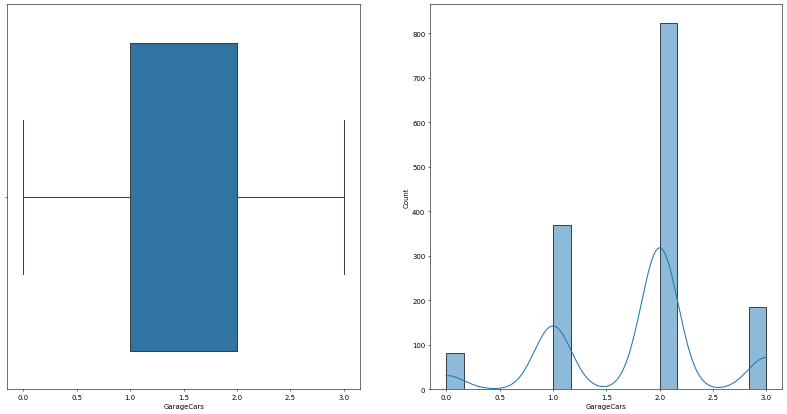

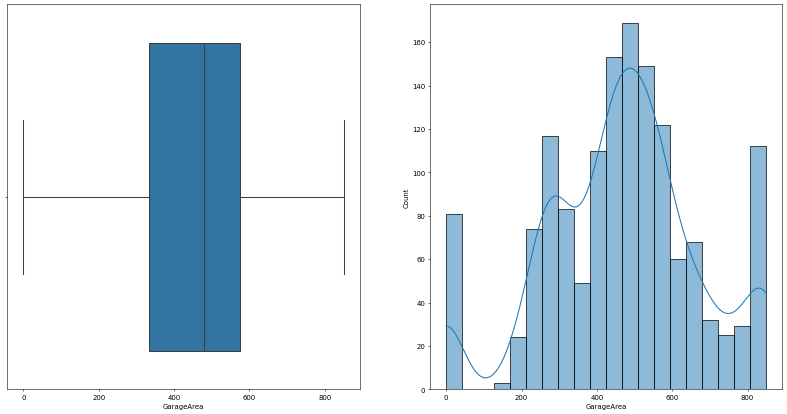

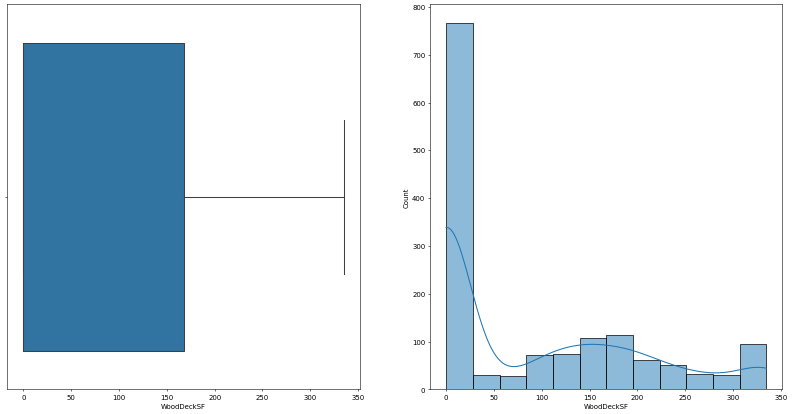

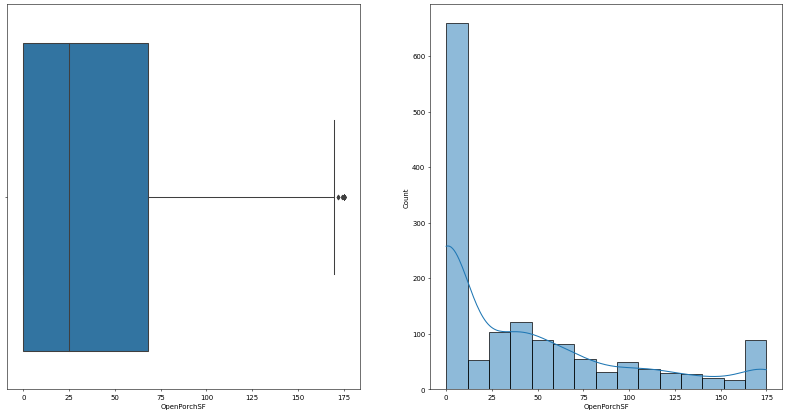

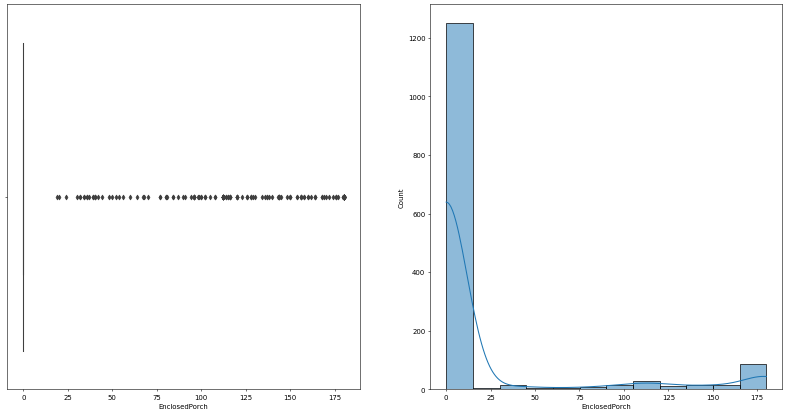

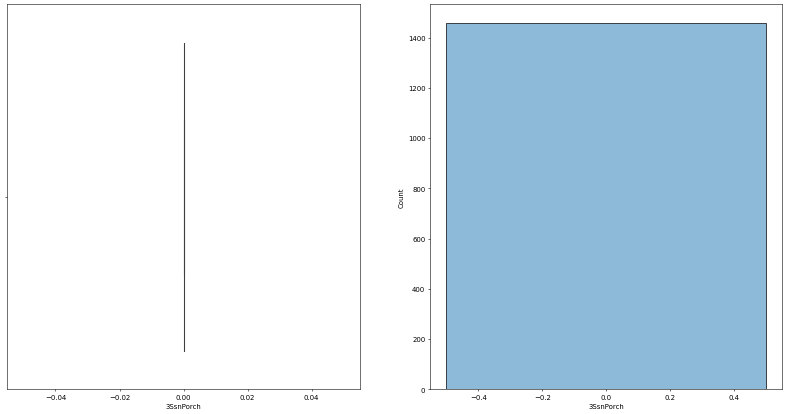

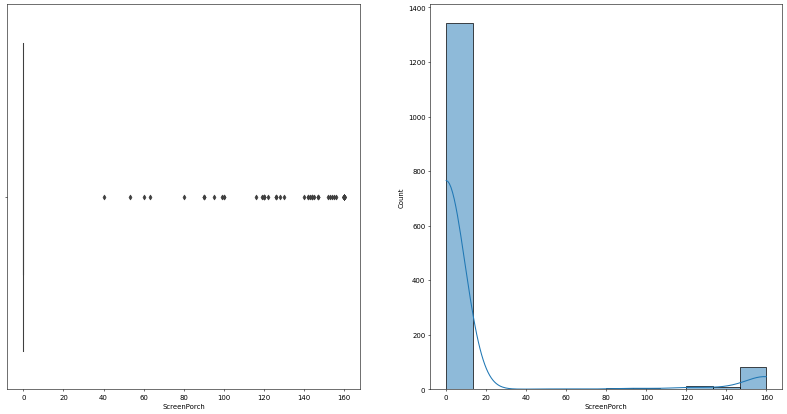

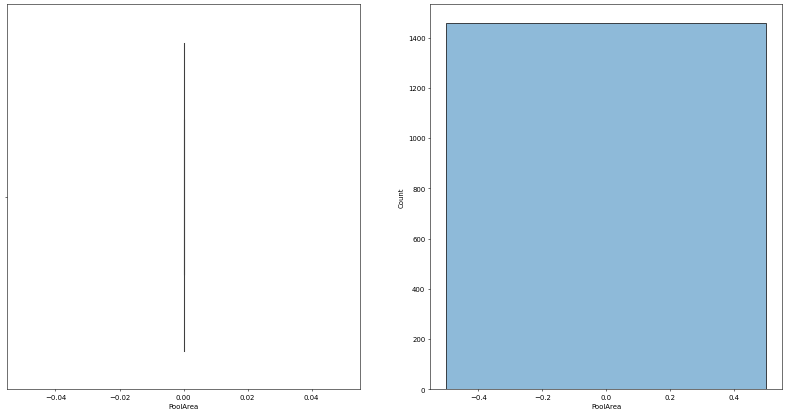

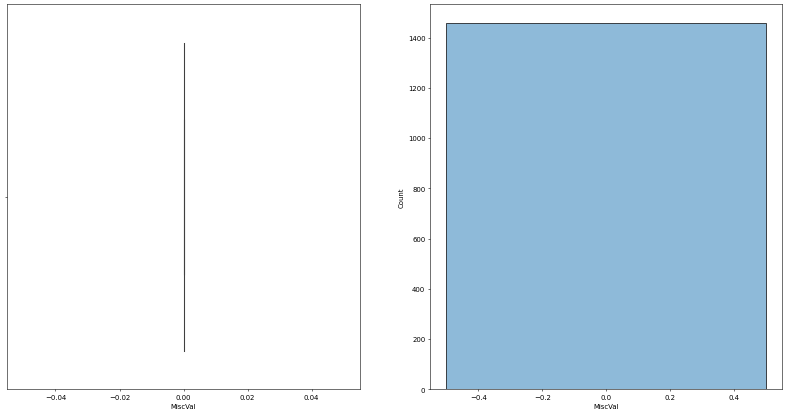

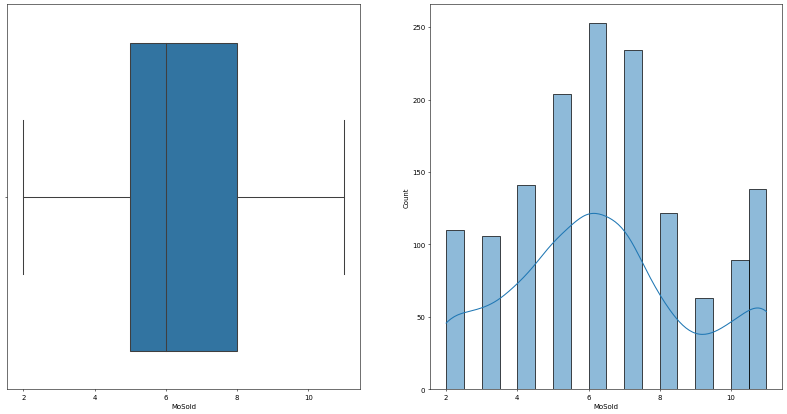

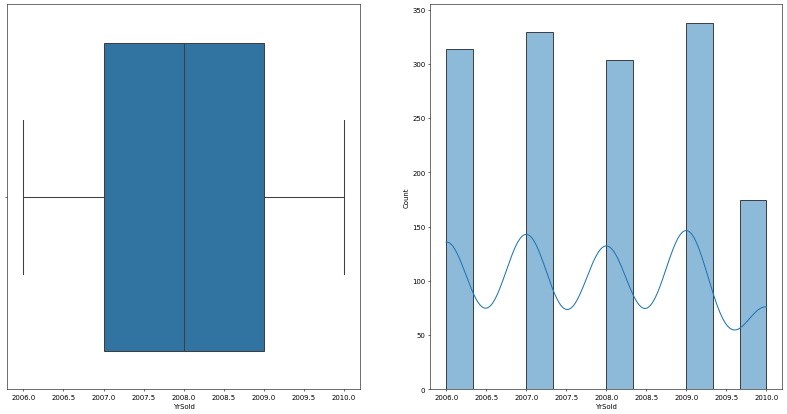

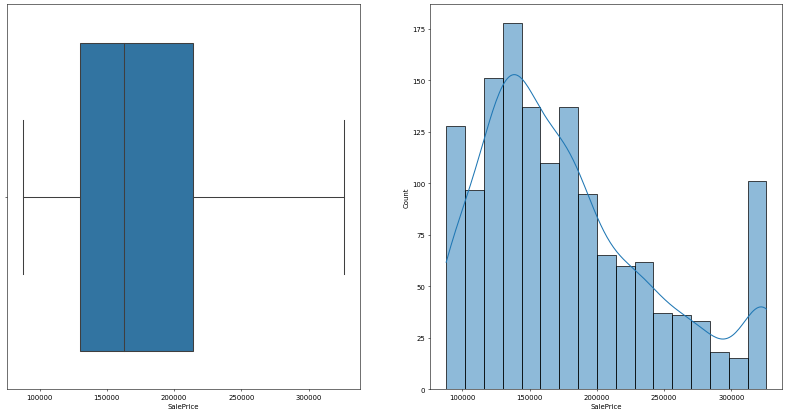

In [29]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2,figsize=(20,10),dpi=50);
    sns.boxplot(ax=axes[0], x=data[col]);
    sns.histplot(ax=axes[1], x=data[col],kde=True);

Most of the num_cols are normalised now...

### NUM COLS vs SalePrice 

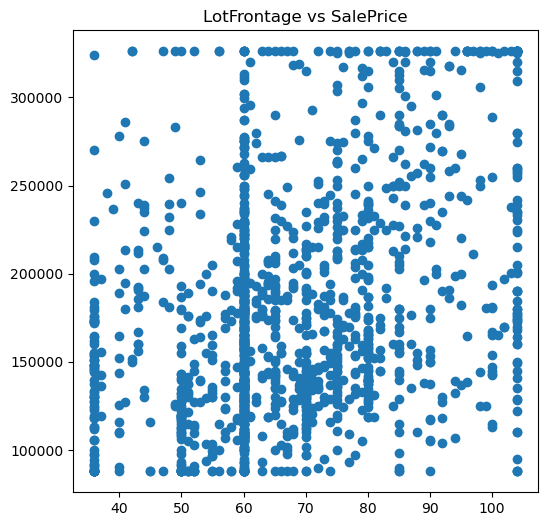

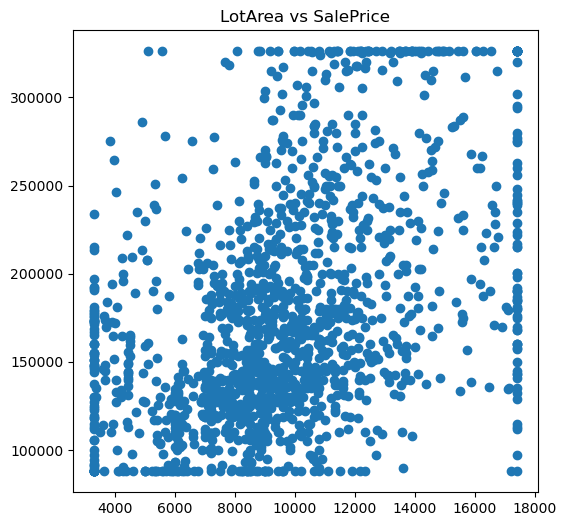

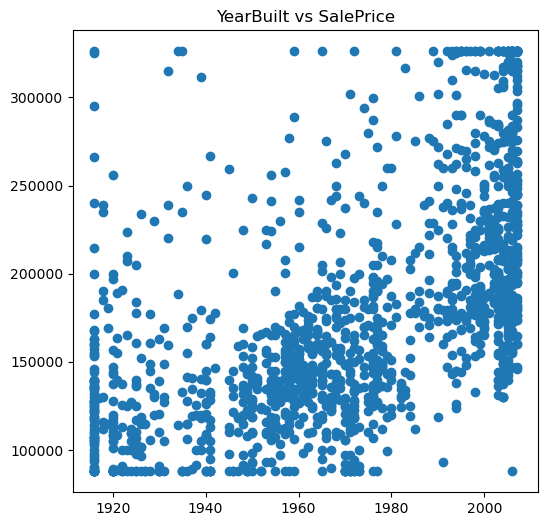

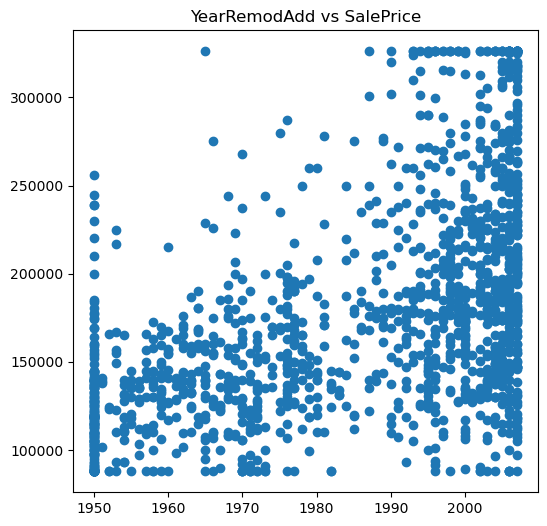

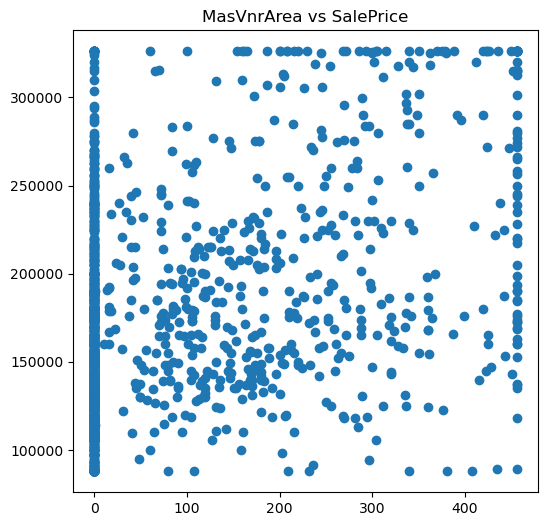

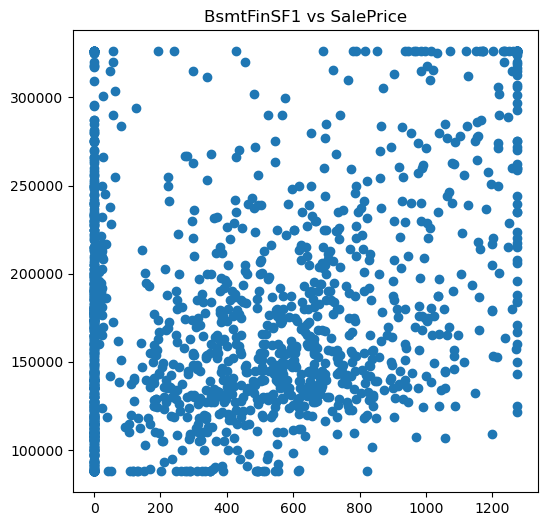

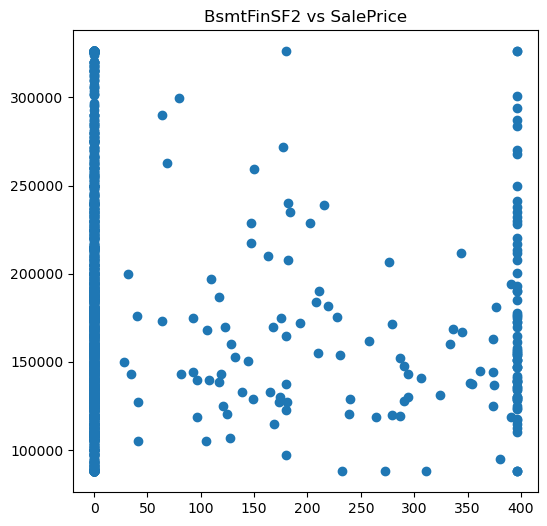

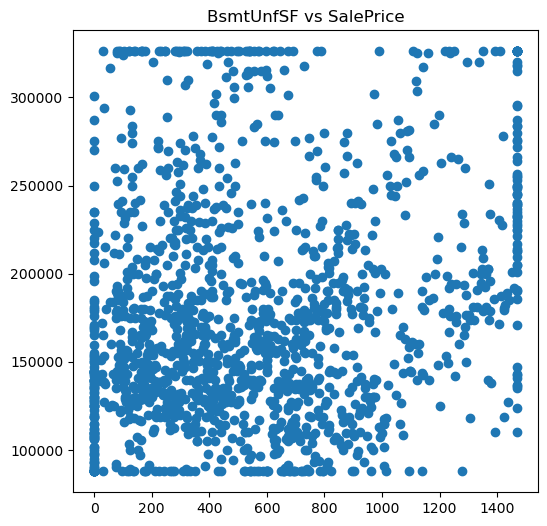

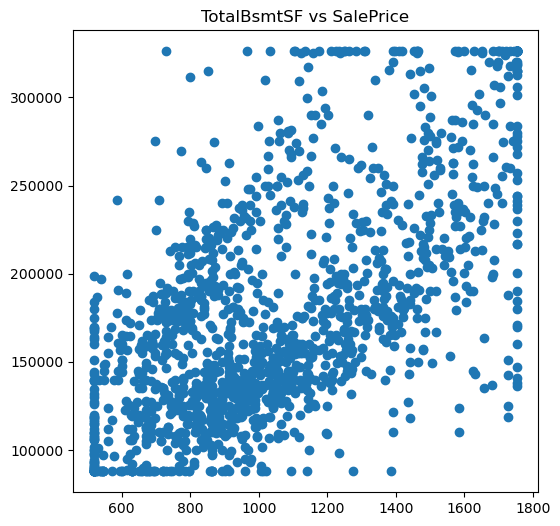

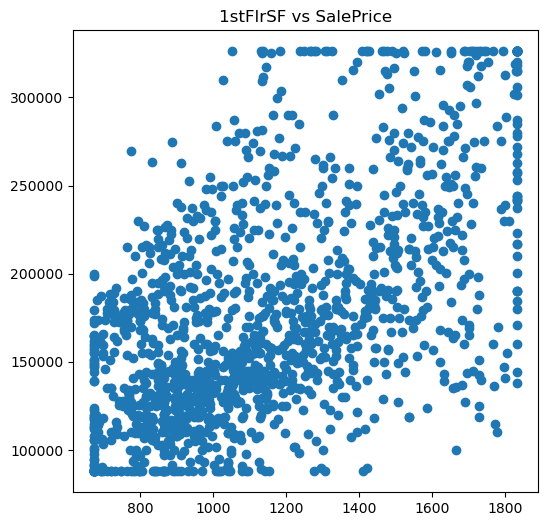

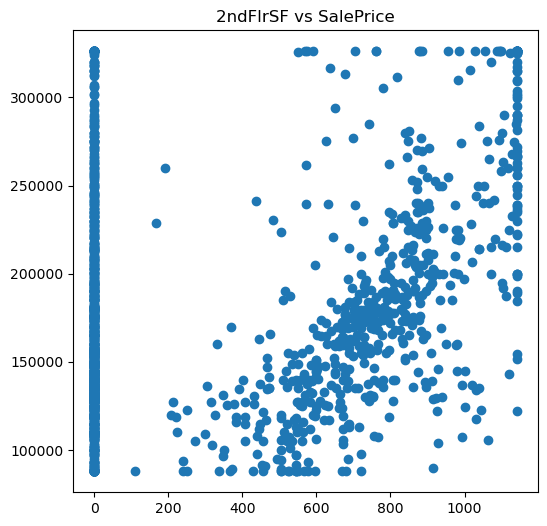

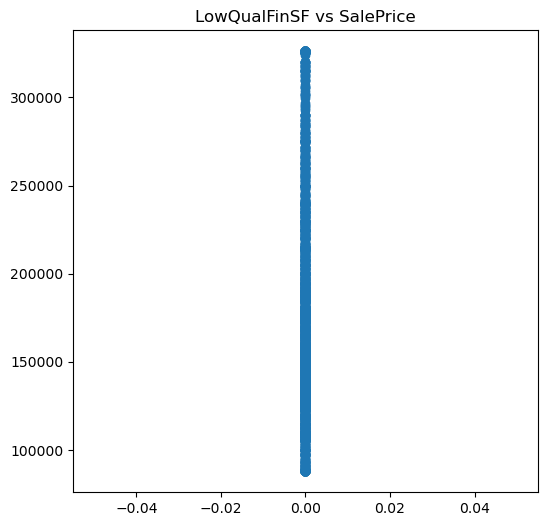

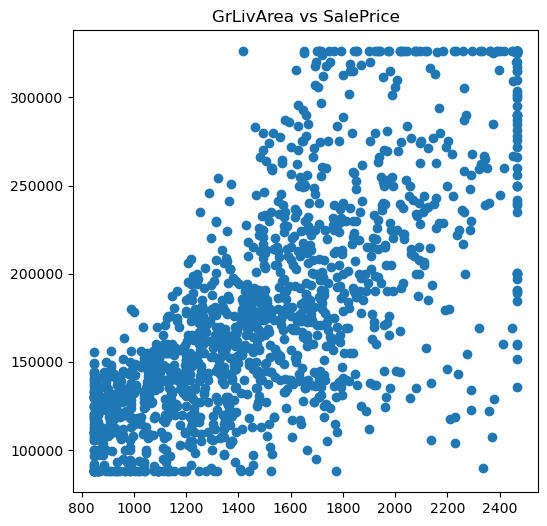

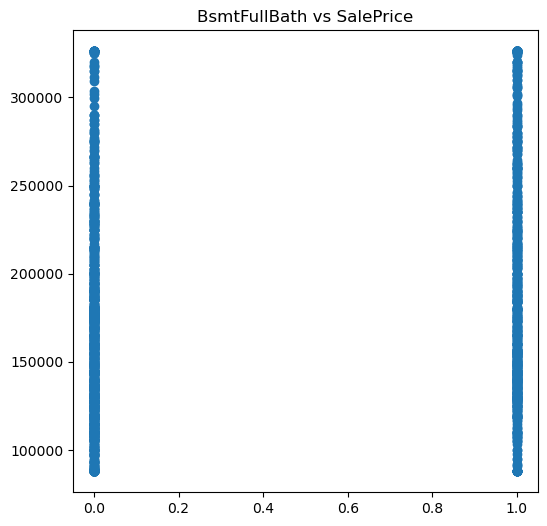

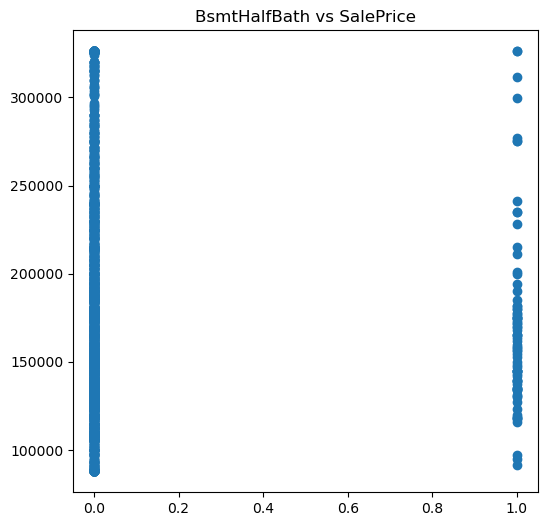

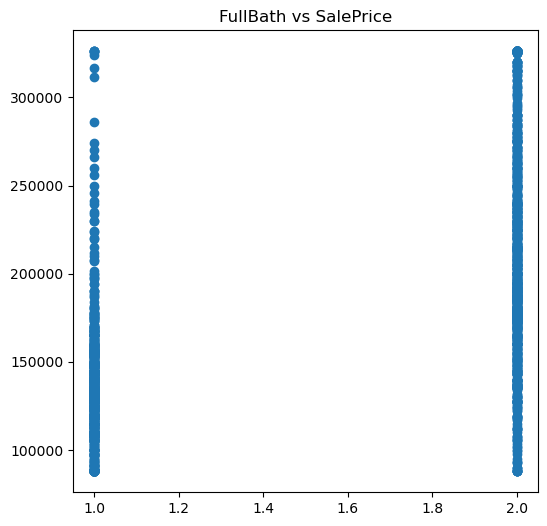

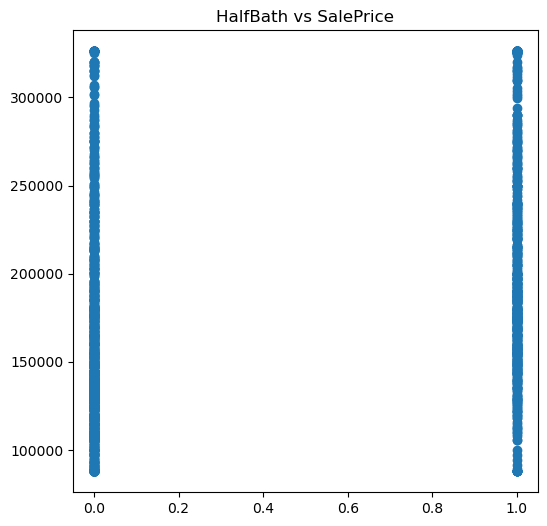

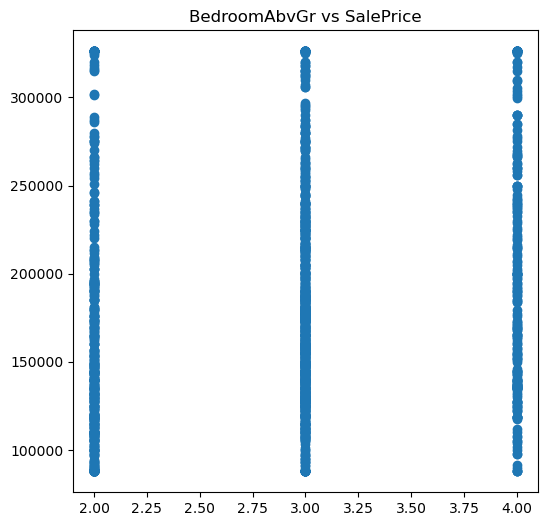

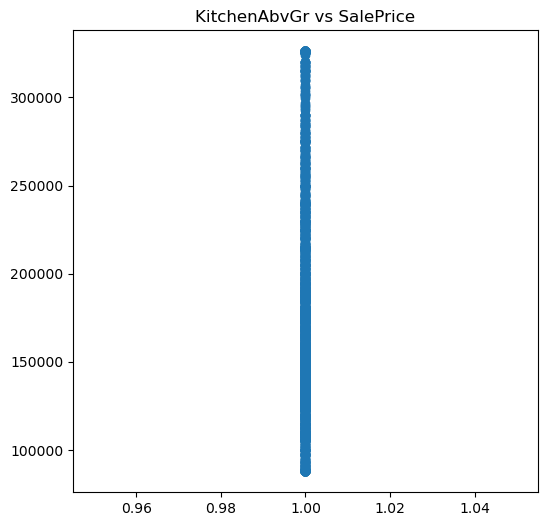

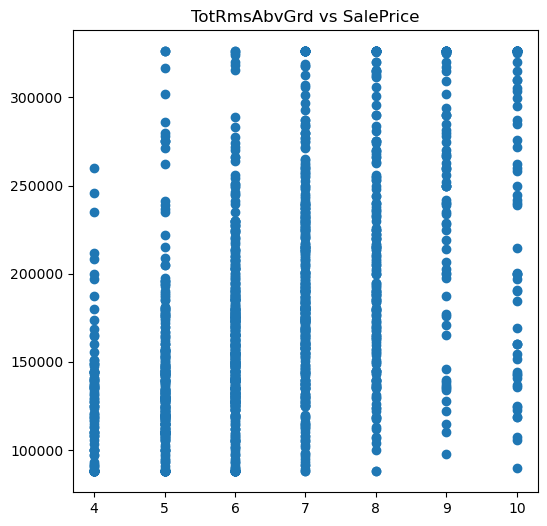

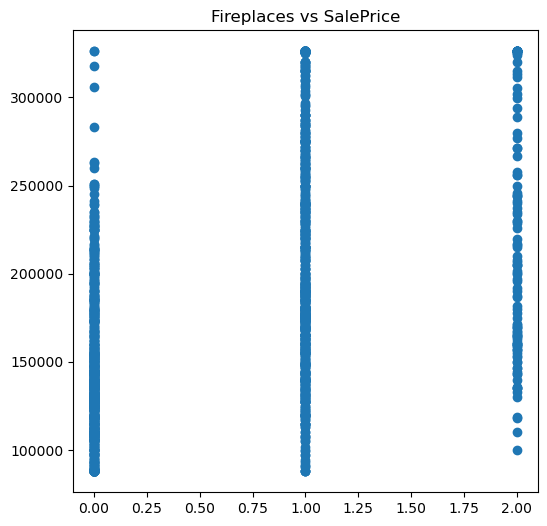

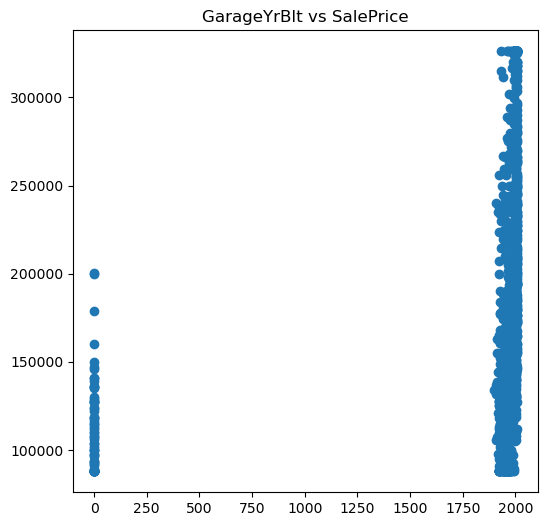

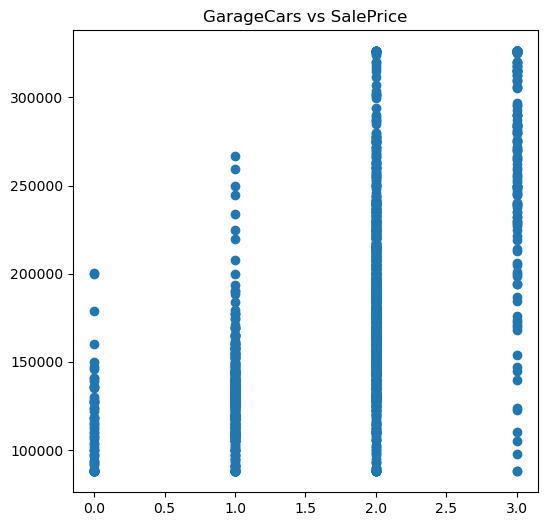

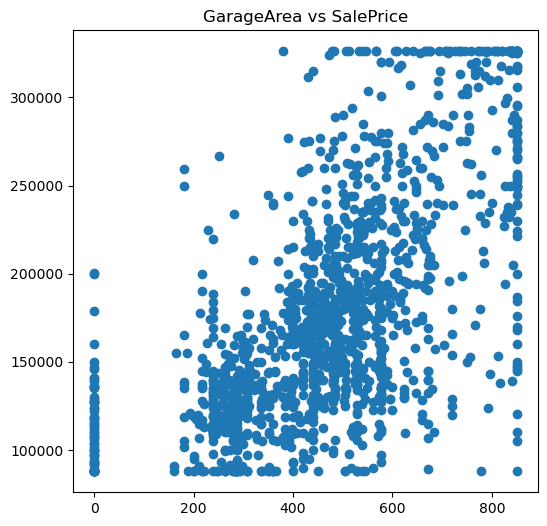

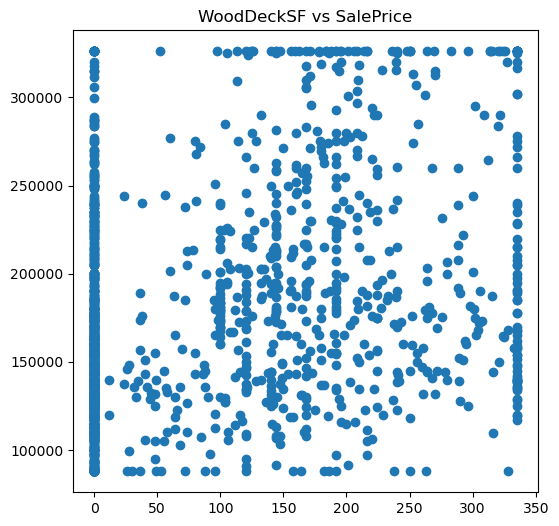

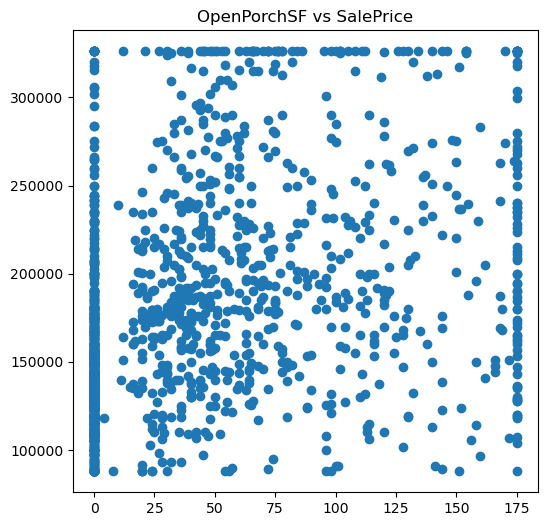

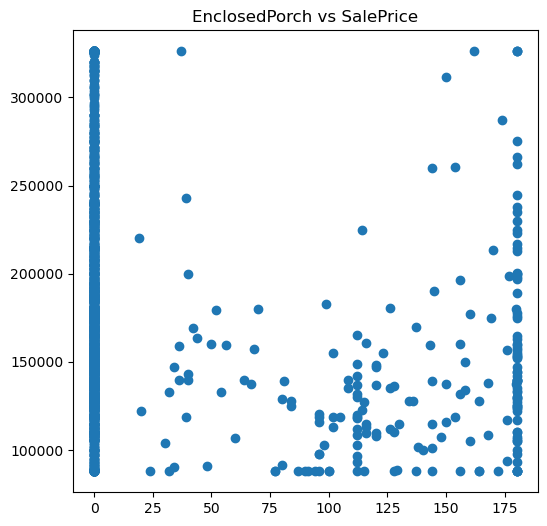

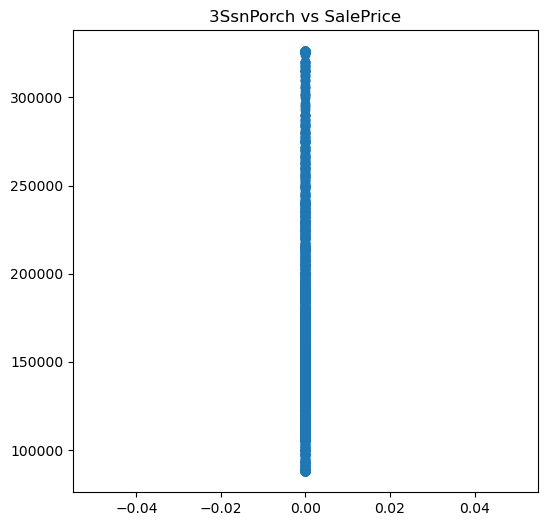

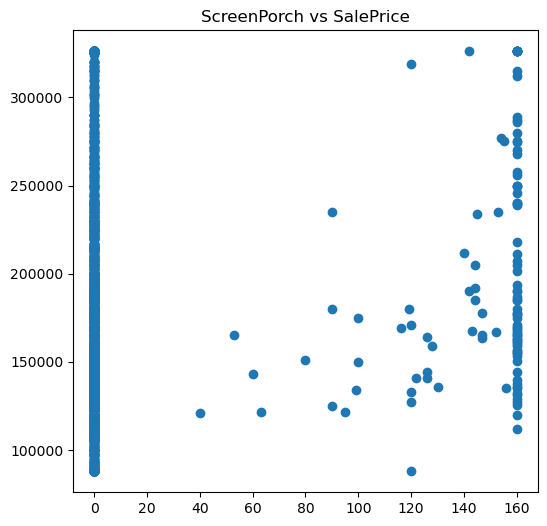

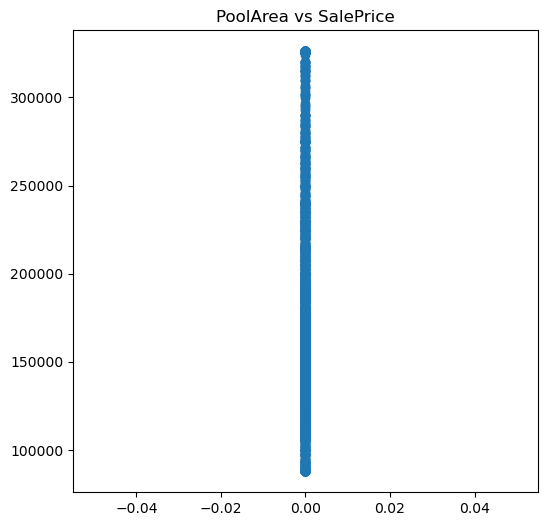

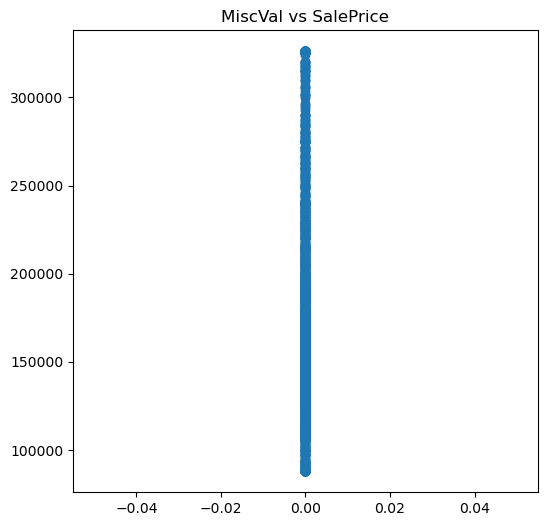

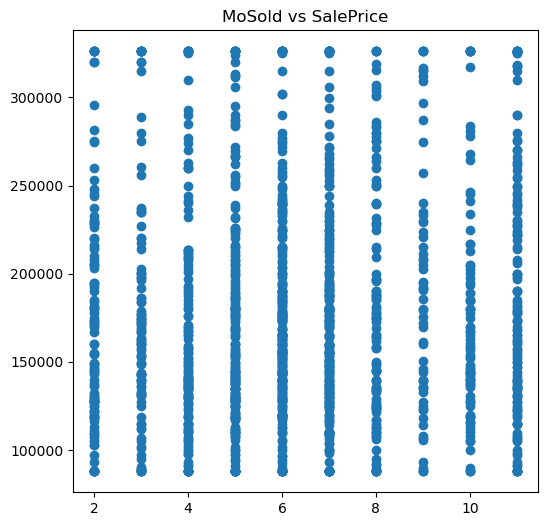

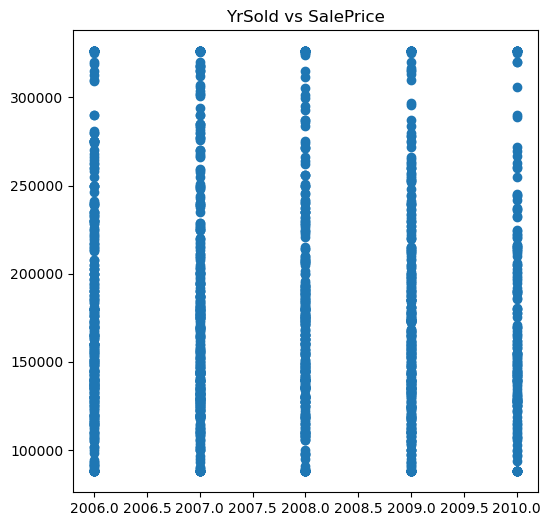

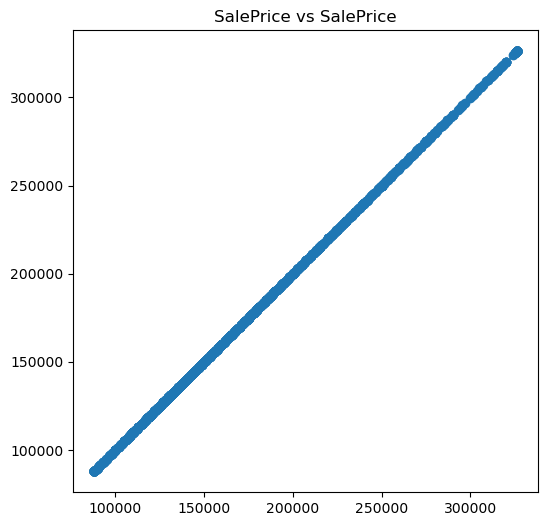

In [30]:
for col in num_cols:
    plt.figure(figsize=[6,6])
    plt.scatter(data[col], data.SalePrice)
    plt.title(col+' vs SalePrice')
    plt.show()

### visualising categorical variable

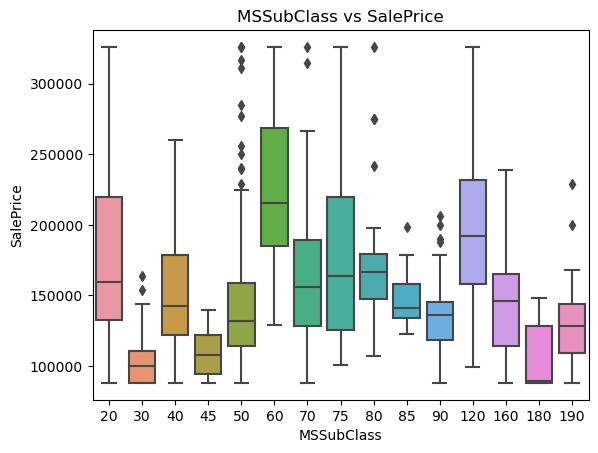

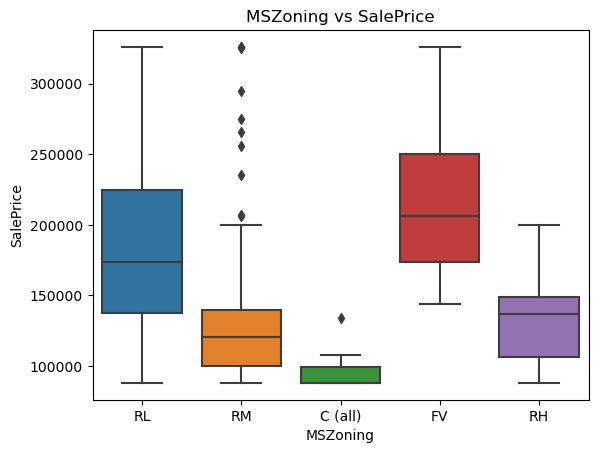

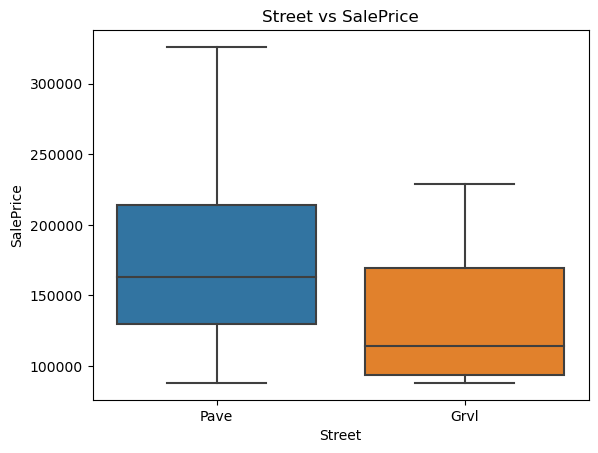

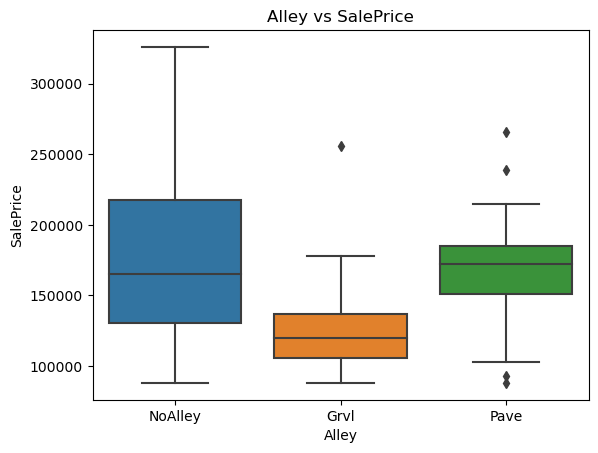

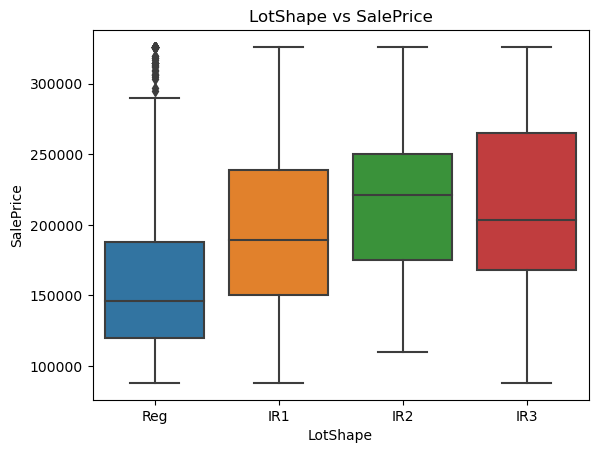

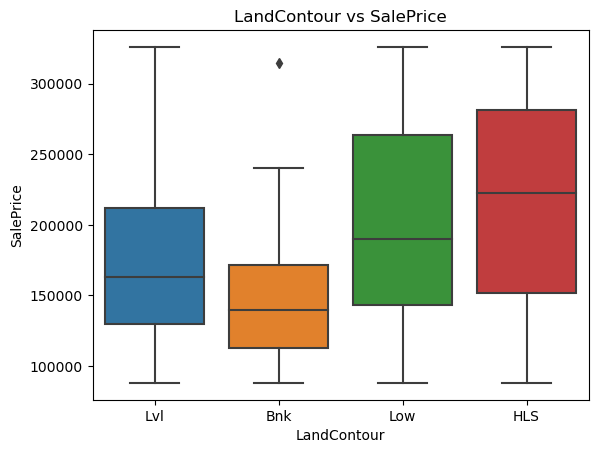

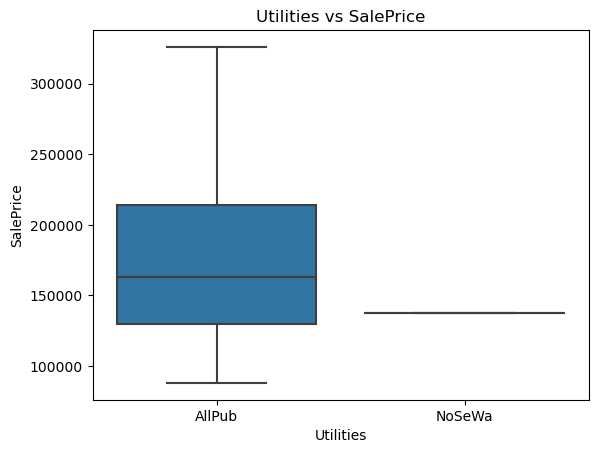

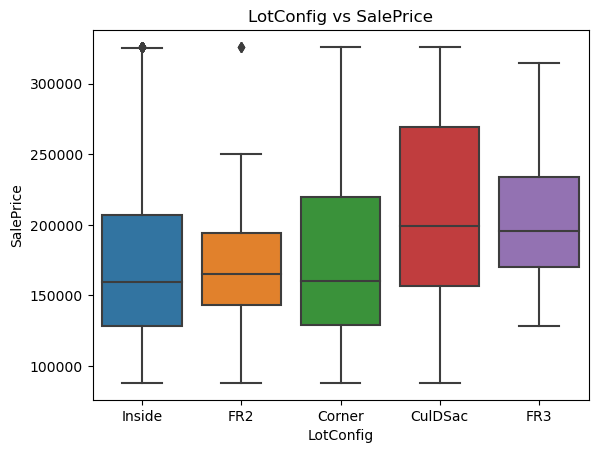

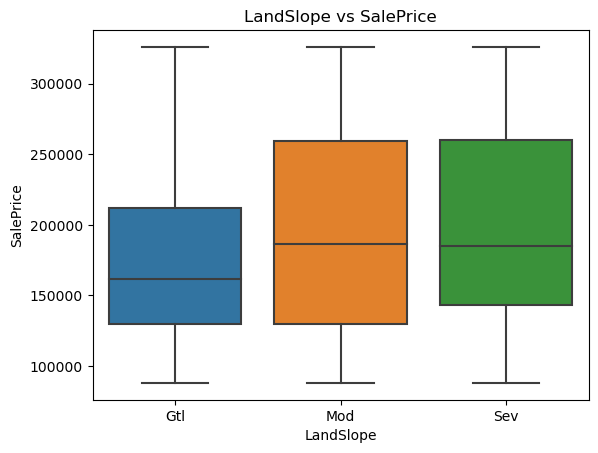

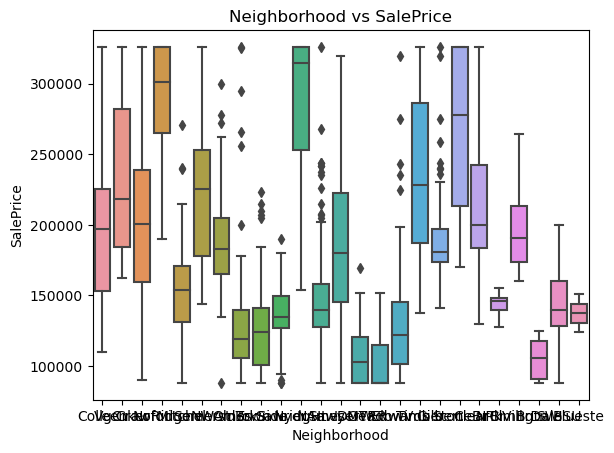

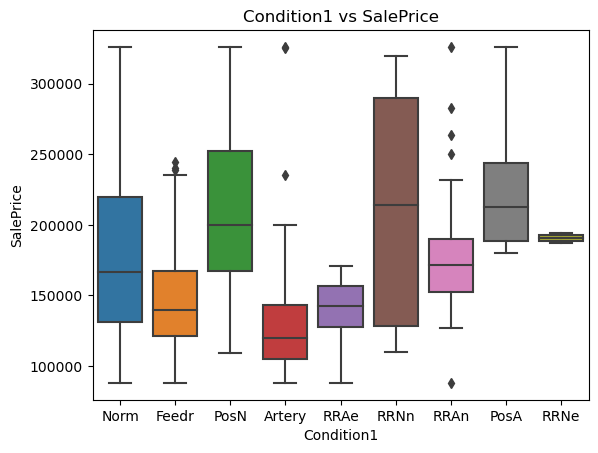

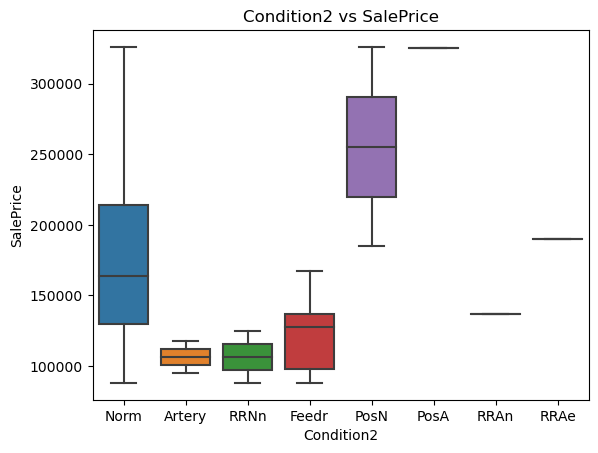

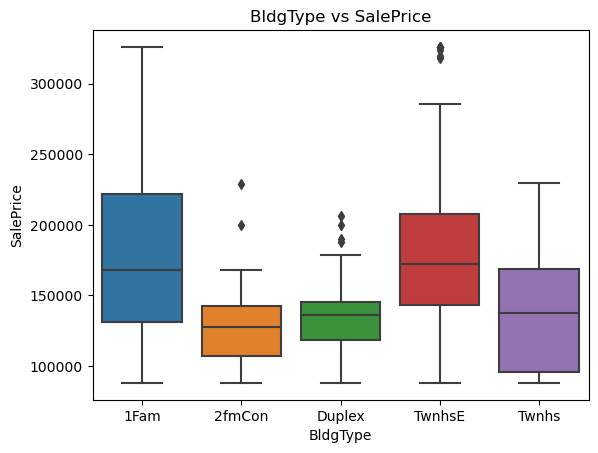

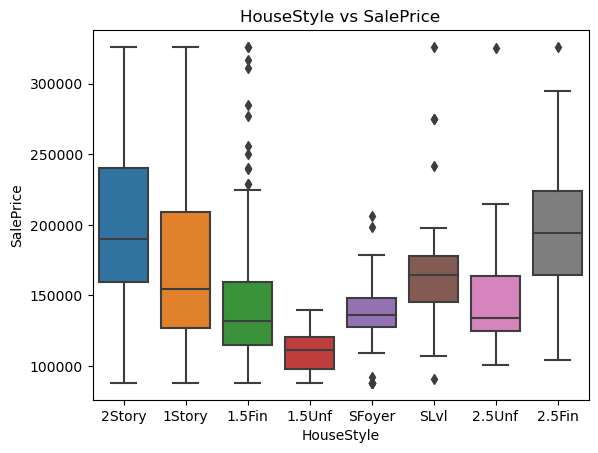

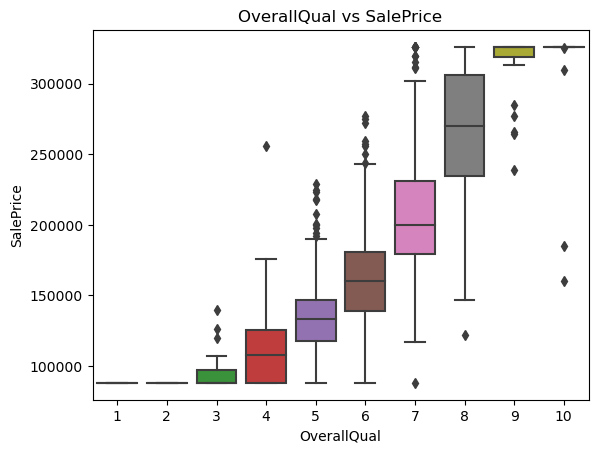

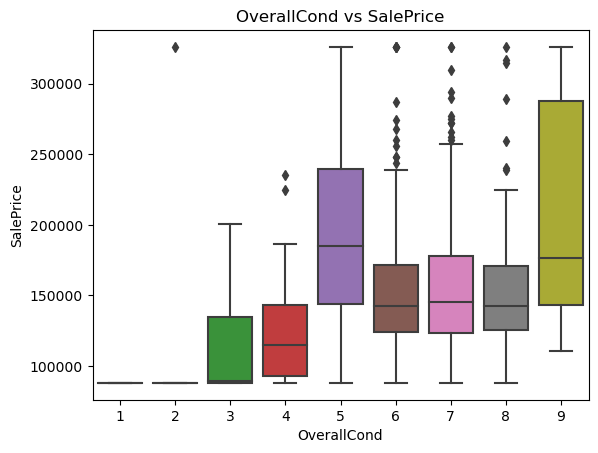

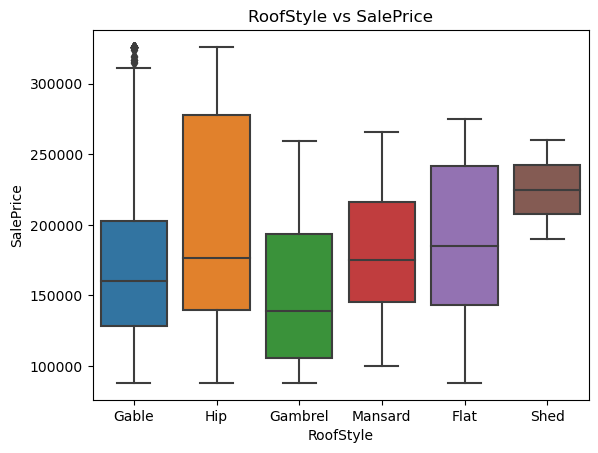

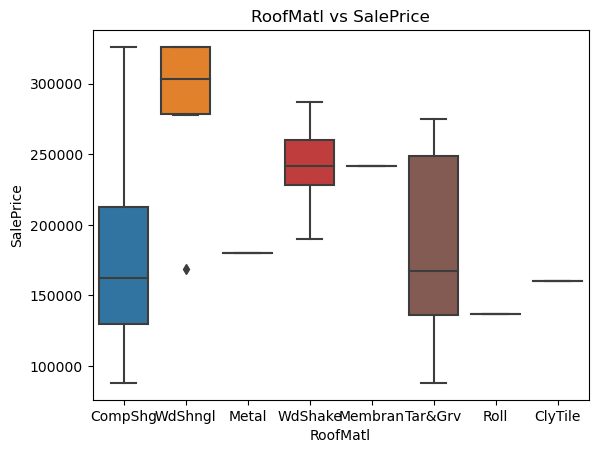

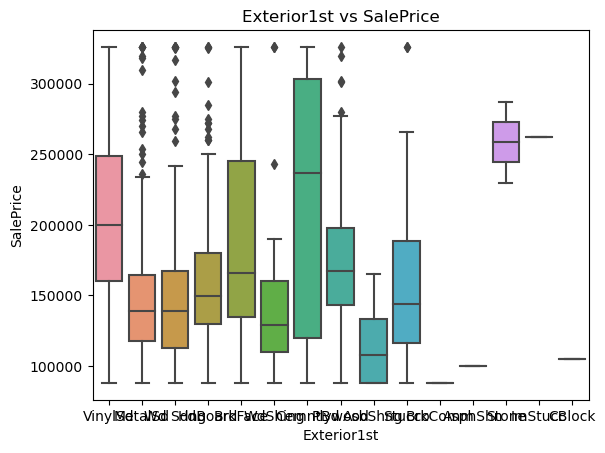

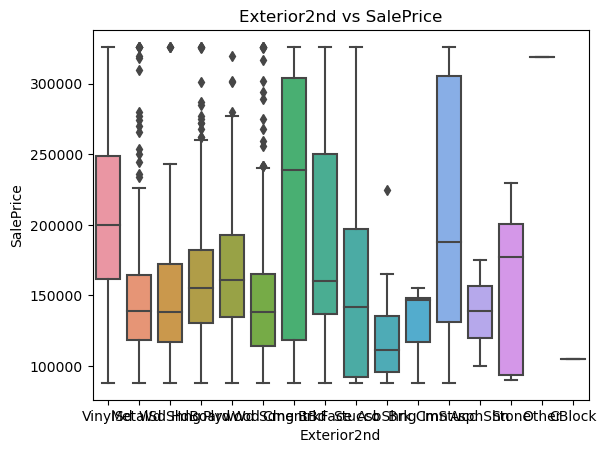

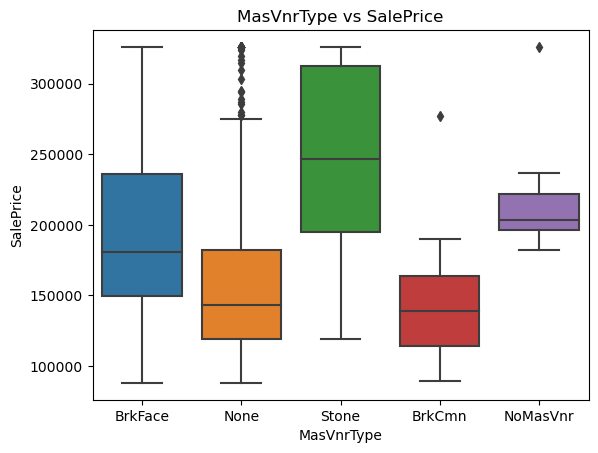

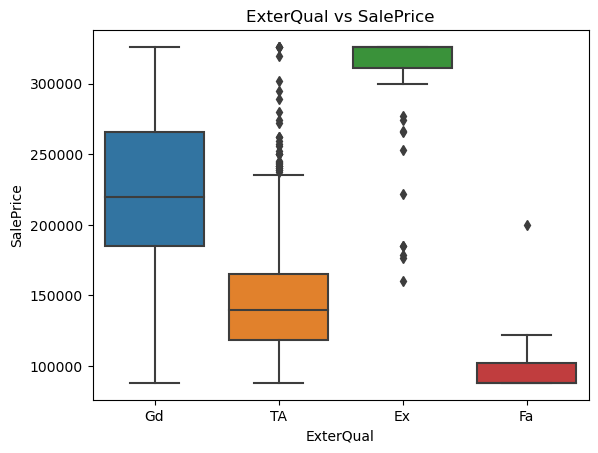

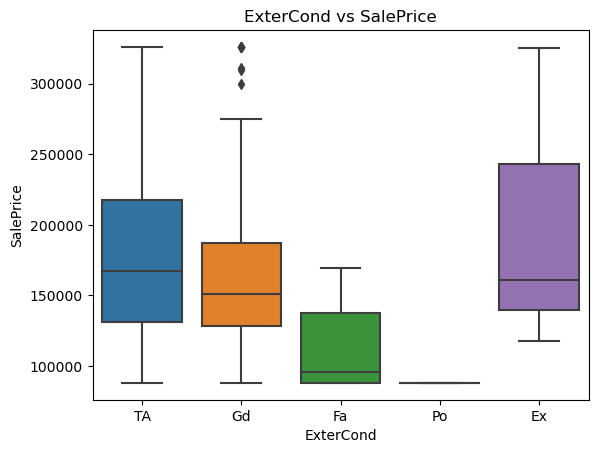

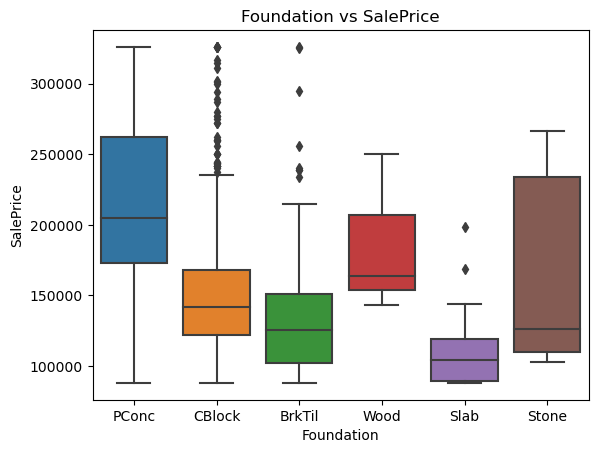

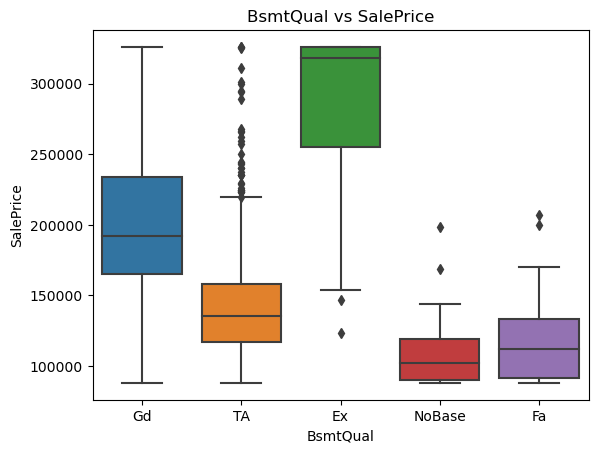

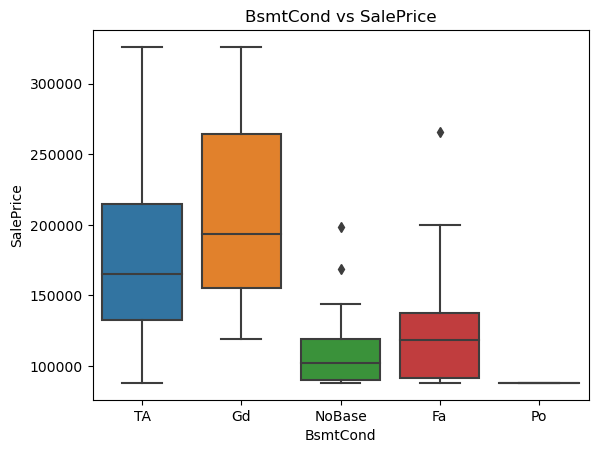

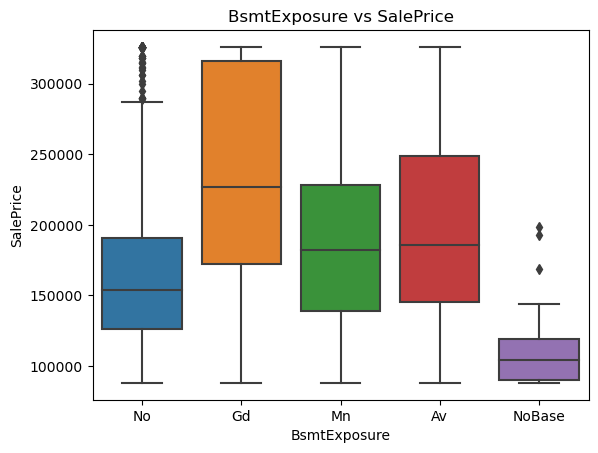

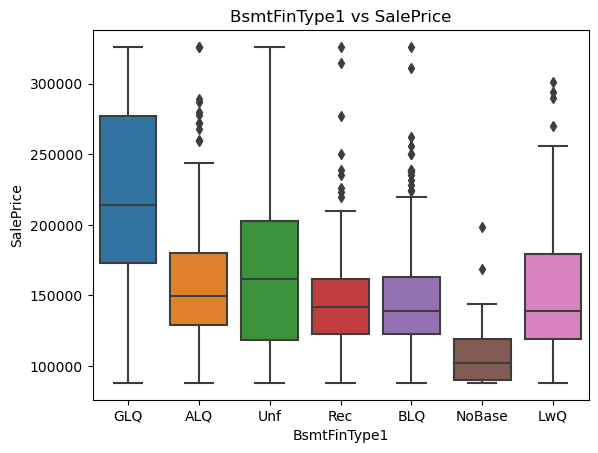

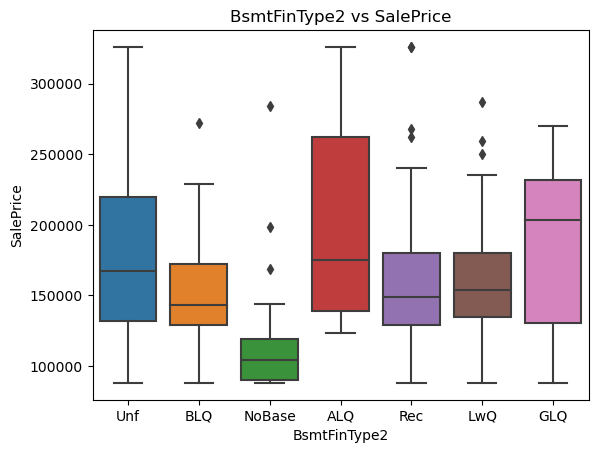

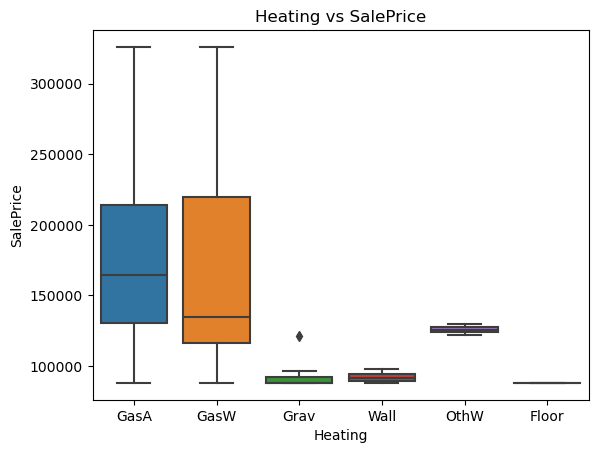

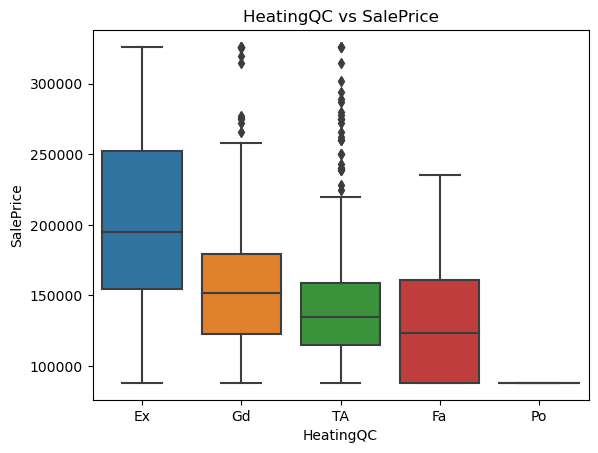

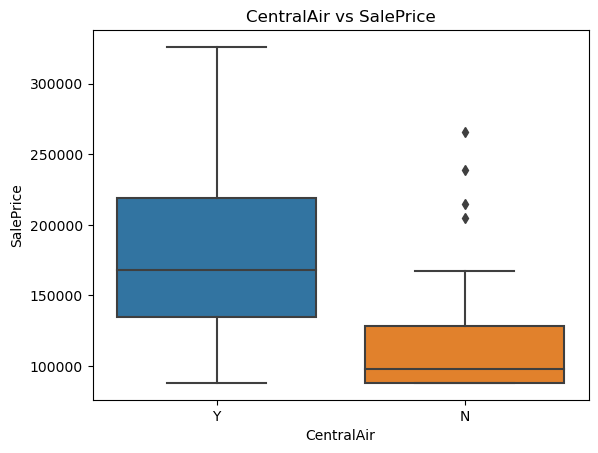

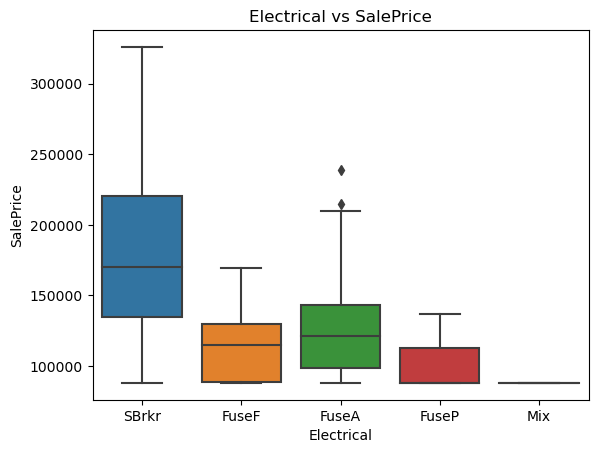

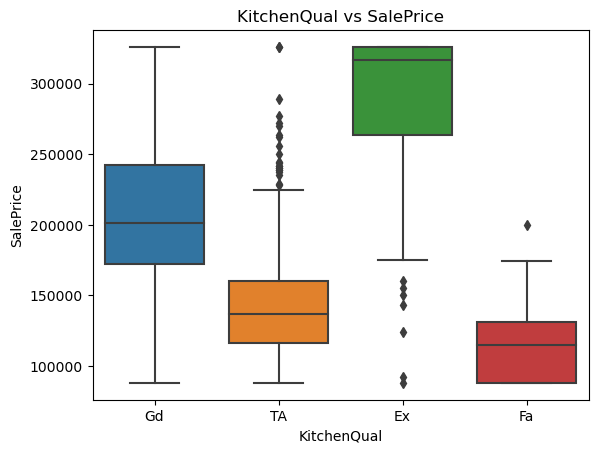

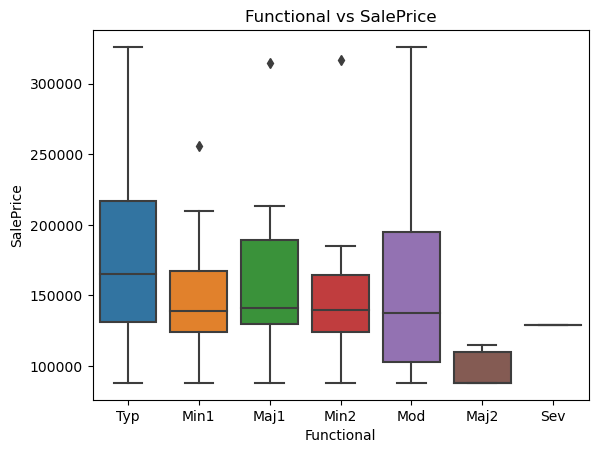

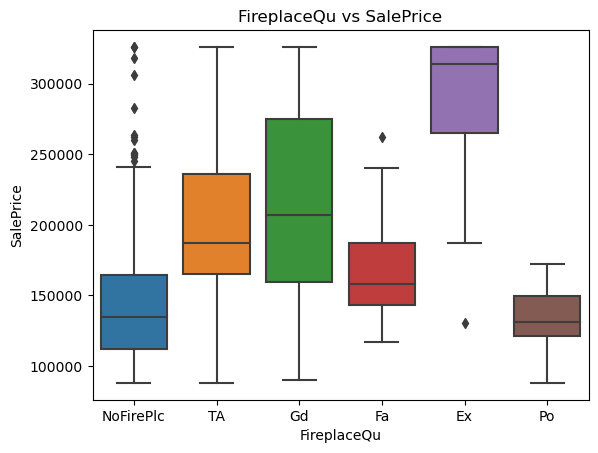

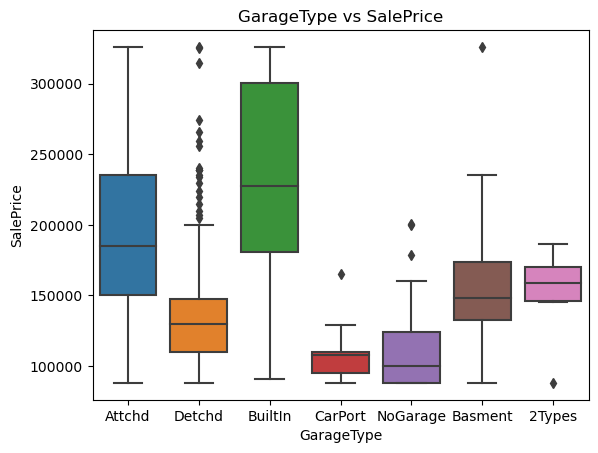

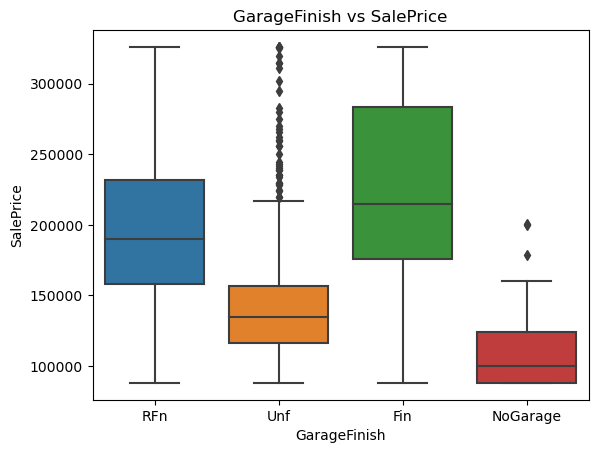

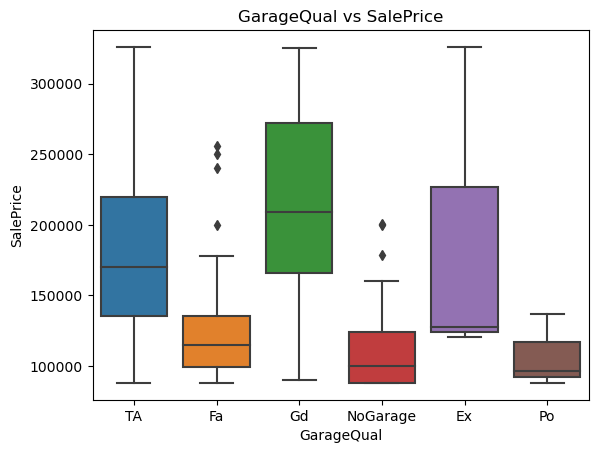

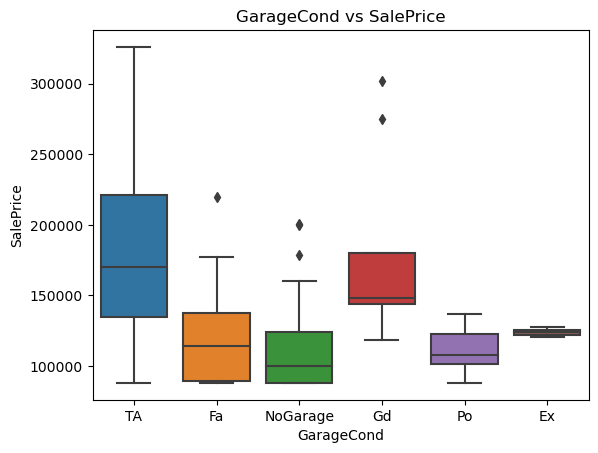

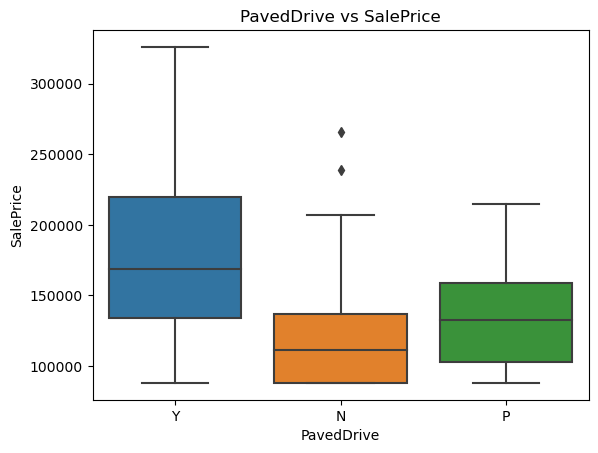

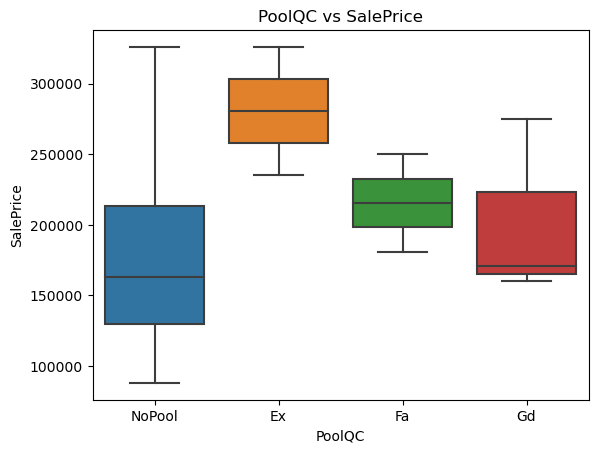

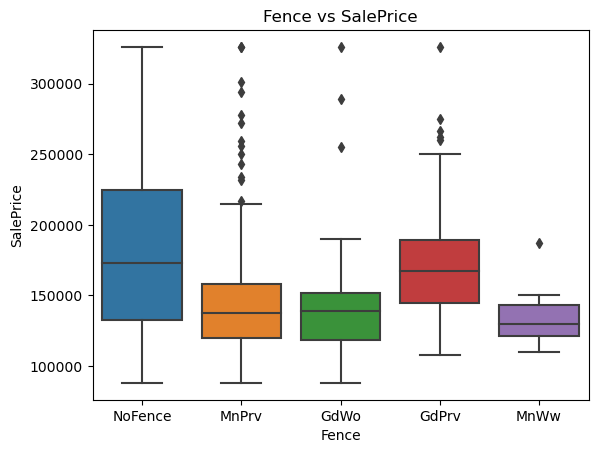

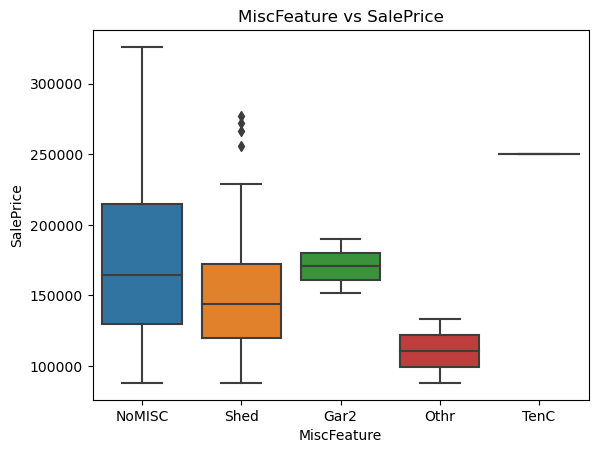

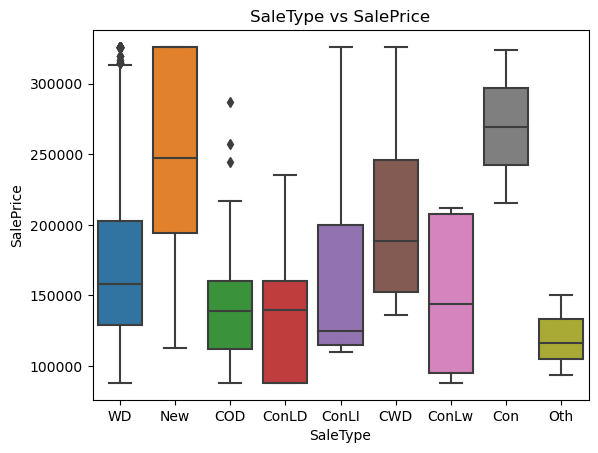

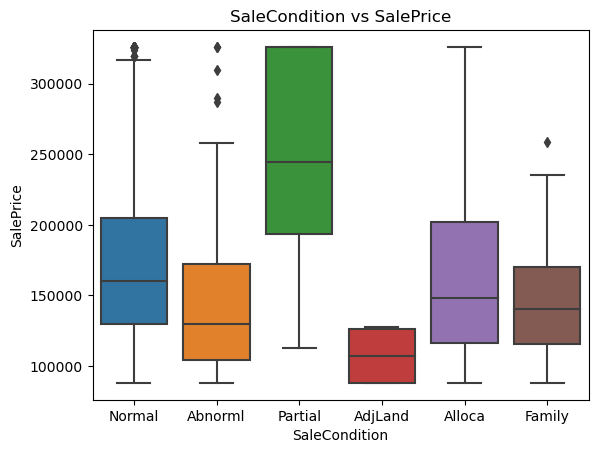

In [31]:
for col in categorical_cols:
    plt.figure()
    sns.boxplot(x=col,y='SalePrice',data=data)
    plt.title(col+' vs SalePrice')
    plt.show() 

In [32]:
for col in categorical_cols:
    print(col,' ##### ',data[col].unique())

MSSubClass  #####  [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
MSZoning  #####  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  #####  ['Pave' 'Grvl']
Alley  #####  ['NoAlley' 'Grvl' 'Pave']
LotShape  #####  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  #####  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  #####  ['AllPub' 'NoSeWa']
LotConfig  #####  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  #####  ['Gtl' 'Mod' 'Sev']
Neighborhood  #####  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  #####  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  #####  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  #####  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  #####  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

### creating dummy variables for categorical variables

In [33]:
for col in categorical_cols:
    unique_val=data[col].unique()
    vallist=[]
    replist=[]
    #i=0
    #print(col)
    for val in unique_val:
        replist.append(col+'#'+str(val))
        vallist.append(val)
        #i=i+1
    #print(col,"###",vallist,'###',replist)
    data[col]=data[col].replace(vallist,replist)
data[categorical_cols].head()

MSSubClass     MSZoning       Street          Alley      LotShape  \
0  MSSubClass#60  MSZoning#RL  Street#Pave  Alley#NoAlley  LotShape#Reg   
1  MSSubClass#20  MSZoning#RL  Street#Pave  Alley#NoAlley  LotShape#Reg   
2  MSSubClass#60  MSZoning#RL  Street#Pave  Alley#NoAlley  LotShape#IR1   
3  MSSubClass#70  MSZoning#RL  Street#Pave  Alley#NoAlley  LotShape#IR1   
4  MSSubClass#60  MSZoning#RL  Street#Pave  Alley#NoAlley  LotShape#IR1   

       LandContour         Utilities         LotConfig      LandSlope  \
0  LandContour#Lvl  Utilities#AllPub  LotConfig#Inside  LandSlope#Gtl   
1  LandContour#Lvl  Utilities#AllPub     LotConfig#FR2  LandSlope#Gtl   
2  LandContour#Lvl  Utilities#AllPub  LotConfig#Inside  LandSlope#Gtl   
3  LandContour#Lvl  Utilities#AllPub  LotConfig#Corner  LandSlope#Gtl   
4  LandContour#Lvl  Utilities#AllPub     LotConfig#FR2  LandSlope#Gtl   

           Neighborhood  ...         GarageType      GarageFinish  \
0  Neighborhood#CollgCr  ...  GarageType#Attchd  GarageFinish#RFn   
1  Neighborhood#Veenker  ...  GarageType#Attchd  GarageFinish#RFn   
2  Neighborhood#CollgCr  ...  GarageType#Attchd  GarageFinish#RFn   
3  Neighborhood#Crawfor  ...  GarageType#Detchd  GarageFinish#Unf   
4  Neighborhood#NoRidge  ...  GarageType#Attchd  GarageFinish#RFn   

      GarageQual     GarageCond    PavedDrive         PoolQC          Fence  \
0  GarageQual#TA  GarageCond#TA  PavedDrive#Y  PoolQC#NoPool  Fence#NoFence   
1  GarageQual#TA  GarageCond#TA  PavedDrive#Y  PoolQC#NoPool  Fence#NoFence   
2  GarageQual#TA  GarageCond#TA  PavedDrive#Y  PoolQC#NoPool  Fence#NoFence   
3  GarageQual#TA  GarageCond#TA  PavedDrive#Y  PoolQC#NoPool  Fence#NoFence   
4  GarageQual#TA  GarageCond#TA  PavedDrive#Y  PoolQC#NoPool  Fence#NoFence   

          MiscFeature     SaleType          SaleCondition  
0  MiscFeature#NoMISC  SaleType#WD   SaleCondition#Normal  
1  MiscFeature#NoMISC  SaleType#WD   SaleCondition#Normal  
2  MiscFeature#NoMISC  SaleType#WD   SaleCondition#Normal  
3  MiscFeature#NoMISC  SaleType#WD  SaleCondition#Abnorml  
4  MiscFeature#NoMISC  SaleType#WD   SaleCondition#Normal  

[5 rows x 46 columns]

In [34]:
for col in categorical_cols:
    data_d = pd.get_dummies(data[col], drop_first = True)
    data = pd.concat([data, data_d], axis = 1)
data.drop(columns=categorical_cols,inplace=True)
data.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0   8450.0       2003          2003       196.0         706   
1         80.0   9600.0       1976          1976         0.0         978   
2         68.0  11250.0       2001          2002       162.0         486   
3         60.0   9550.0       1916          1970         0.0         216   
4         84.0  14260.0       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType#ConLI  \
0         0.0        150        856.0     856.0  ...               0   
1         0.0        284       1262.0    1262.0  ...               0   
2         0.0        434        920.0     920.0  ...               0   
3         0.0        540        756.0     961.0  ...               0   
4         0.0        490       1145.0    1145.0  ...               0   

   SaleType#ConLw  SaleType#New  SaleType#Oth  SaleType#WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition#AdjLand  SaleCondition#Alloca  SaleCondition#Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition#Normal  SaleCondition#Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 289 columns]

In [35]:
data.shape

(1460, 289)

In [36]:
data.describe()

LotFrontage       LotArea    YearBuilt  YearRemodAdd   MasVnrArea  \
count  1460.000000   1460.000000  1460.000000   1460.000000  1460.000000   
mean     67.515993   9682.319212  1971.787671   1984.794521    92.047945   
std      16.874101   3469.967624    28.872129     20.565620   140.590668   
min      35.950000   3311.700000  1916.000000   1950.000000     0.000000   
25%      60.000000   7553.500000  1954.000000   1967.000000     0.000000   
50%      63.000000   9478.500000  1973.000000   1994.000000     0.000000   
75%      79.000000  11601.500000  2000.000000   2004.000000   164.250000   
max     104.000000  17401.150000  2007.000000   2007.000000   456.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    431.089041    32.931233   556.537671  1055.950616  1151.861370  ...   
std     412.214952   100.569218   414.582219   346.901853   333.684061  ...   
min       0.000000     0.000000     0.000000   519.300000   672.950000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    1274.000000   396.200000  1468.000000  1753.000000  1831.250000  ...   

       SaleType#ConLI  SaleType#ConLw  SaleType#New  SaleType#Oth  \
count     1460.000000     1460.000000   1460.000000   1460.000000   
mean         0.003425        0.003425      0.083562      0.002055   
std          0.058440        0.058440      0.276824      0.045299   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType#WD  SaleCondition#AdjLand  SaleCondition#Alloca  \
count  1460.000000            1460.000000           1460.000000   
mean      0.867808               0.002740              0.008219   
std       0.338815               0.052289              0.090317   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition#Family  SaleCondition#Normal  SaleCondition#Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 289 columns]

In [37]:
cols=data.columns
cols

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType#ConLI', 'SaleType#ConLw', 'SaleType#New', 'SaleType#Oth',
       'SaleType#WD', 'SaleCondition#AdjLand', 'SaleCondition#Alloca',
       'SaleCondition#Family', 'SaleCondition#Normal',
       'SaleCondition#Partial'],
      dtype='object', length=289)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 289 entries, LotFrontage to SaleCondition#Partial
dtypes: float64(13), int64(21), uint8(255)
memory usage: 751.5 KB


### Train & Test Data Split

In [39]:
#Train & Test data split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
df_train.shape

(1021, 289)

In [41]:
df_test.shape

(438, 289)

### Rescaling the Features

In [42]:
scaler = StandardScaler()
df_train[num_cols]= scaler.fit_transform(df_train[num_cols])
df_train.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
210     -0.012779 -1.170115  -1.607275     -1.697583   -0.650325    0.082728   
318      1.342905  0.073241   0.730763      0.396163    1.158620    1.341089   
239     -0.896920 -0.262199  -0.919617     -1.697583   -0.650325   -0.824068   
986     -0.484321 -1.255205  -1.916721      0.883081   -0.650325   -1.051979   
1416    -0.425378  0.490009  -1.916721     -1.697583   -0.650325   -1.051979   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType#ConLI  \
210    -0.332312  -0.373082    -0.552365 -0.862759  ...               0   
318    -0.332312  -0.458591     0.815810  0.637526  ...               0   
239    -0.332312   0.208848    -0.917778 -1.057678  ...               0   
986    -0.332312  -0.161687    -1.528782 -0.458154  ...               0   
1416   -0.332312   0.531878    -0.798806  0.265408  ...               0   

      SaleType#ConLw  SaleType#New  SaleType#Oth  SaleType#WD  \
210                0             0             0            1   
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   

      SaleCondition#AdjLand  SaleCondition#Alloca  SaleCondition#Family  \
210                       0                     0                     0   
318                       0                     0                     0   
239                       0                     0                     0   
986                       0                     0                     0   
1416                      0                     0                     0   

      SaleCondition#Normal  SaleCondition#Partial  
210                      1                      0  
318                      1                      0  
239                      1                      0  
986                      1                      0  
1416                     1                      0  

[5 rows x 289 columns]

In [43]:
df_train.describe()

LotFrontage       LotArea     YearBuilt  YearRemodAdd    MasVnrArea  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -8.003175e-17  5.984983e-16 -1.471888e-15 -1.200476e-15 -2.000794e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.842951e+00 -1.833557e+00 -1.916721e+00 -1.697583e+00 -6.503249e-01   
25%   -4.253780e-01 -6.370001e-01 -6.101704e-01 -8.698231e-01 -6.503249e-01   
50%   -4.253780e-01 -4.252749e-02  4.310492e-02  4.448550e-01 -6.503249e-01   
75%    6.355918e-01  5.397894e-01  9.714435e-01  9.317728e-01  4.661333e-01   
max    2.168104e+00  2.244239e+00  1.212124e+00  1.077848e+00  2.571858e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -5.567426e-17 -7.785697e-17 -1.391856e-17 -3.001191e-16 -1.478848e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.051979e+00 -3.323120e-01 -1.313672e+00 -1.528782e+00 -1.426990e+00   
25%   -1.051979e+00 -3.323120e-01 -8.006230e-01 -7.534834e-01 -8.302723e-01   
50%   -1.015406e-01 -3.323120e-01 -2.163176e-01 -1.897840e-01 -2.071226e-01   
75%    6.743275e-01 -3.323120e-01  6.007598e-01  7.223324e-01  7.851915e-01   
max    2.036946e+00  3.489110e+00  2.173159e+00  1.965870e+00  1.993836e+00   

       ...  SaleType#ConLI  SaleType#ConLw  SaleType#New  SaleType#Oth  \
count  ...     1021.000000     1021.000000   1021.000000   1021.000000   
mean   ...        0.002938        0.003918      0.078355      0.002938   
std    ...        0.054153        0.062500      0.268860      0.054153   
min    ...        0.000000        0.000000      0.000000      0.000000   
25%    ...        0.000000        0.000000      0.000000      0.000000   
50%    ...        0.000000        0.000000      0.000000      0.000000   
75%    ...        0.000000        0.000000      0.000000      0.000000   
max    ...        1.000000        1.000000      1.000000      1.000000   

       SaleType#WD  SaleCondition#AdjLand  SaleCondition#Alloca  \
count  1021.000000            1021.000000           1021.000000   
mean      0.870715               0.002938              0.007835   
std       0.335680               0.054153              0.088214   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition#Family  SaleCondition#Normal  SaleCondition#Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.013712              0.825661               0.078355  
std                0.116350              0.379587               0.268860  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 289 columns]

In [44]:
df_test[num_cols]= scaler.transform(df_test[num_cols])
df_test.head()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1436    -0.425378 -0.187238  -0.025661     -0.675056   -0.650325    0.441567   
57       1.283962  0.578283   1.108975      0.931773   -0.650325   -1.051979   
780     -0.248550 -0.512838   0.799529      0.542239   -0.381810   -1.051979   
382      0.694535 -0.116330   1.177741      1.029156   -0.650325   -1.051979   
1170     0.517706  0.067453   0.180637     -0.382905   -0.650325    0.213656   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType#ConLI  \
1436   -0.332312  -0.724616    -0.552365 -0.862759  ...               0   
57     -0.332312   0.729022    -0.563695 -0.874572  ...               0   
780    -0.332312   1.624482     0.504218  0.286081  ...               0   
382    -0.332312   0.916665    -0.339915 -0.641260  ...               0   
1170   -0.332312   0.049708     0.104813 -0.112617  ...               0   

      SaleType#ConLw  SaleType#New  SaleType#Oth  SaleType#WD  \
1436               0             0             0            1   
57                 0             0             0            1   
780                0             0             0            1   
382                0             0             0            1   
1170               0             0             0            1   

      SaleCondition#AdjLand  SaleCondition#Alloca  SaleCondition#Family  \
1436                      0                     0                     0   
57                        0                     0                     0   
780                       0                     0                     0   
382                       0                     0                     0   
1170                      0                     0                     0   

      SaleCondition#Normal  SaleCondition#Partial  
1436                     1                      0  
57                       1                      0  
780                      1                      0  
382                      1                      0  
1170                     1                      0  

[5 rows x 289 columns]

In [45]:
df_test.describe()

LotFrontage     LotArea   YearBuilt  YearRemodAdd  MasVnrArea  \
count   438.000000  438.000000  438.000000    438.000000  438.000000   
mean      0.055450    0.033952    0.002835     -0.012603    0.001830   
std       0.979511    1.014958    0.975798      1.005269    0.978602   
min      -1.842951   -1.833557   -1.916721     -1.697583   -0.650325   
25%      -0.425378   -0.548437   -0.610170     -0.918515   -0.650325   
50%      -0.130664   -0.075087    0.008722      0.396163   -0.650325   
75%       0.753477    0.594201    1.005826      0.931773    0.579192   
max       2.168104    2.244239    1.212124      1.077848    2.571858   

       BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF  ...  \
count  438.000000  438.000000  438.000000   438.000000  438.000000  ...   
mean    -0.024923   -0.048189    0.029052    -0.029154   -0.041848  ...   
std      0.997843    0.896197    0.948320     0.941706    0.951189  ...   
min     -1.051979   -0.332312   -1.313672    -1.528782   -1.426990  ...   
25%     -1.051979   -0.332312   -0.709177    -0.696830   -0.756439  ...   
50%     -0.177915   -0.332312   -0.124871    -0.208196   -0.199739  ...   
75%      0.668872   -0.332312    0.609073     0.536793    0.551141  ...   
max      2.036946    3.489110    2.173159     1.965870    1.993836  ...   

       SaleType#ConLI  SaleType#ConLw  SaleType#New  SaleType#Oth  \
count      438.000000      438.000000    438.000000         438.0   
mean         0.004566        0.002283      0.095890           0.0   
std          0.067496        0.047782      0.294778           0.0   
min          0.000000        0.000000      0.000000           0.0   
25%          0.000000        0.000000      0.000000           0.0   
50%          0.000000        0.000000      0.000000           0.0   
75%          0.000000        0.000000      0.000000           0.0   
max          1.000000        1.000000      1.000000           0.0   

       SaleType#WD  SaleCondition#AdjLand  SaleCondition#Alloca  \
count   438.000000             438.000000            438.000000   
mean      0.860731               0.002283              0.009132   
std       0.346623               0.047782              0.095235   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition#Family  SaleCondition#Normal  SaleCondition#Partial  
count            438.000000            438.000000             438.000000  
mean               0.013699              0.808219               0.102740  
std                0.116370              0.394152               0.303966  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 289 columns]

### Model Building and Evaluation

In [46]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [48]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-6472553960.899654
[ 8.75593823e-03  6.84423588e-02  1.88908979e-01  5.24303772e-02
  1.70890404e-02 -2.43286335e-03 -2.12401746e-02 -7.13780432e-02
  2.07407275e-01 -3.99373450e-02  7.27219959e-02 -9.67908986e+10
  3.40868763e-01  1.63074237e-02 -1.78908757e-02  7.65289122e-03
 -6.21293429e-03 -1.57822793e-02  3.03011676e+10 -1.35480439e-02
  8.09010833e-04 -5.43422740e-01  9.79425203e-04  9.90372919e-02
  2.47836972e-02  1.45898197e-02  3.42286653e-03  1.68742965e+10
 -5.71469955e-04  1.22983160e+09  1.40643256e+10  8.78720979e-03
 -5.37121319e-03 -1.39035166e-01 -1.51886546e-01 -3.76191585e+09
  1.43315384e-01  1.71063644e-01 -1.19759237e-01  6.68776488e-02
  1.20739523e-01  1.48906818e-01  2.11289265e-01  4.85534671e-01
 -4.78433082e-04  9.01974434e-02 -2.21501271e+10  3.09490490e-01
  2.88843663e-01  2.28024261e-01  1.67143051e-01 -7.36642277e-04
 -1.82539984e-02  5.71550876e-03 -2.46417307e-02  1.99685914e-01
  1.01518485e-02 -3.89276595e-02  3.13485157e-02  7.05092534e-02
 -2.30

In [50]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr##',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr##',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr##',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr##',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr##',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr##',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr## 0.9616933425355334
r2_test_lr## -4.429974405878773e+18
rss1_lr## 39.1110972712204
rss2_lr## 1.8742039159805208e+21
mse_train_lr## 0.038306657464466605
mse_test_lr## 4.2790043743847506e+18


### Ridge and Lasso Regression

### Ridge

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [53]:
#Fitting Ridge model for best parm alpha = 8.0
ridge_alpha = 8.0
ridge = Ridge(alpha=ridge_alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.50860597e-02  6.34665410e-02  1.12670636e-01  6.64013375e-02
  1.84011535e-02  3.32148426e-02 -1.84688161e-03 -4.80132755e-02
  1.69707423e-01  2.35609142e-03  9.09951414e-02  0.00000000e+00
  2.96131340e-01  1.79872073e-02 -1.41242600e-02  6.04966673e-03
  7.87887341e-03 -1.46876495e-02  0.00000000e+00 -1.58723618e-02
  2.39591194e-02 -2.63889739e-02  2.48115289e-02  7.90822365e-02
  2.70205255e-02  1.25533609e-02  3.42576878e-04  0.00000000e+00
  2.70191904e-03  0.00000000e+00  0.00000000e+00  4.22530311e-03
 -3.59882083e-03 -9.45913746e-02 -5.66631696e-02 -9.20184876e-02
  6.56844185e-02  4.08212532e-02  1.43829294e-02  5.66126196e-02
  3.05429920e-02  1.96785974e-02  7.16783935e-02  5.89756729e-02
 -3.94703331e-03  9.15031386e-03 -1.06613609e-01  9.49383536e-02
  5.77495713e-02  4.87374313e-02 -1.29453686e-02 -1.82044400e-02
  9.92964577e-03  4.54270744e-03 -7.25501748e-03 -3.57380703e-02
  5.06111393e-03  7.50526048e-02  7.30983463e-02  9.31149688e-02
 -3.30218052e-02  8.74386

In [54]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr##',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr##',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr##',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr##',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr##',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr##',mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr## 0.9447879383506882
r2_test_lr## 0.8912020324952291
rss1_lr## 56.37151494394739
rss2_lr## 46.02951576369516
mse_train_lr## 0.05521206164931184
mse_test_lr## 0.10509021863857342


### Lasso

In [55]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [57]:
#Fitting Lasso model for best alpha = 0.001

lasso_alpha =0.001

lasso = Lasso(alpha=lasso_alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [58]:
lasso.coef_

array([ 1.80045838e-02,  6.52061422e-02,  1.40556957e-01,  6.60358606e-02,
        2.56822048e-02,  6.38858616e-02,  3.12525191e-04, -1.71582732e-02,
        1.54002141e-01, -0.00000000e+00,  7.01382244e-02,  0.00000000e+00,
        2.99685507e-01,  2.16776936e-02, -1.45789799e-02,  2.15742744e-03,
        1.03016272e-02, -1.91725675e-02,  0.00000000e+00, -9.17935036e-03,
        2.53046589e-02, -1.62934466e-02,  4.29770569e-03,  8.70087428e-02,
        2.94728944e-02,  1.16702515e-02,  4.15768951e-04,  0.00000000e+00,
        2.06943237e-03,  0.00000000e+00,  0.00000000e+00,  4.75419892e-04,
       -3.16295055e-03, -1.13623981e-01, -0.00000000e+00, -1.66218911e-01,
        2.78272932e-02,  5.41100676e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.41013255e-01,  0.00000000e+00,
        0.00000000e+00,  1.09024885e-02, -3.55237795e-02, -0.00000000e+00,
        0.00000000e+00,  

In [59]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr##',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr##',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr##',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr##',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr##',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr##',mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr## 0.946970450604405
r2_test_lr## 0.8664287006497096
rss1_lr## 54.14316993290247
rss2_lr## 56.51045116032917
mse_train_lr## 0.053029549395594976
mse_test_lr## 0.12901929488659628


In [60]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.616933e-01          0.944788          0.946970
1   R2 Score (Test)      -4.429974e+18          0.891202          0.866429
2       RSS (Train)       3.911110e+01         56.371515         54.143170
3        RSS (Test)       1.874204e+21         46.029516         56.510451
4       MSE (Train)       1.957209e-01          0.234972          0.230281
5        MSE (Test)       2.068575e+09          0.324176          0.359193

### Lets observe the changes in the coefficients after regularization 

In [61]:
betas = pd.DataFrame(index=df_train.columns)
betas.rows = df_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

Linear     Ridge     Lasso
LotFrontage            8.755938e-03  0.015086  0.018005
LotArea                6.844236e-02  0.063467  0.065206
YearBuilt              1.889090e-01  0.112671  0.140557
YearRemodAdd           5.243038e-02  0.066401  0.066036
MasVnrArea             1.708904e-02  0.018401  0.025682
BsmtFinSF1            -2.432863e-03  0.033215  0.063886
BsmtFinSF2            -2.124017e-02 -0.001847  0.000313
BsmtUnfSF             -7.137804e-02 -0.048013 -0.017158
TotalBsmtSF            2.074073e-01  0.169707  0.154002
1stFlrSF              -3.993735e-02  0.002356 -0.000000
2ndFlrSF               7.272200e-02  0.090995  0.070138
LowQualFinSF          -9.679090e+10  0.000000  0.000000
GrLivArea              3.408688e-01  0.296131  0.299686
BsmtFullBath           1.630742e-02  0.017987  0.021678
BsmtHalfBath          -1.789088e-02 -0.014124 -0.014579
FullBath               7.652891e-03  0.006050  0.002157
HalfBath              -6.212934e-03  0.007879  0.010302
BedroomAbvGr          -1.578228e-02 -0.014688 -0.019173
KitchenAbvGr           3.030117e+10  0.000000  0.000000
TotRmsAbvGrd          -1.354804e-02 -0.015872 -0.009179
Fireplaces             8.090108e-04  0.023959  0.025305
GarageYrBlt           -5.434227e-01 -0.026389 -0.016293
GarageCars             9.794252e-04  0.024812  0.004298
GarageArea             9.903729e-02  0.079082  0.087009
WoodDeckSF             2.478370e-02  0.027021  0.029473
OpenPorchSF            1.458982e-02  0.012553  0.011670
EnclosedPorch          3.422867e-03  0.000343  0.000416
3SsnPorch              1.687430e+10  0.000000  0.000000
ScreenPorch           -5.714700e-04  0.002702  0.002069
PoolArea               1.229832e+09  0.000000  0.000000
MiscVal                1.406433e+10  0.000000  0.000000
MoSold                 8.787210e-03  0.004225  0.000475
YrSold                -5.371213e-03 -0.003599 -0.003163
MSSubClass#160        -1.390352e-01 -0.094591 -0.113624
MSSubClass#180        -1.518865e-01 -0.056663 -0.000000
MSSubClass#190        -3.761916e+09 -0.092018 -0.166219
MSSubClass#20          1.433154e-01  0.065684  0.027827
MSSubClass#30          1.710636e-01  0.040821  0.005411
MSSubClass#40         -1.197592e-01  0.014383  0.000000
MSSubClass#45          6.687765e-02  0.056613  0.000000
MSSubClass#50          1.207395e-01  0.030543  0.000000
MSSubClass#60          1.489068e-01  0.019679  0.000000
MSSubClass#70          2.112893e-01  0.071678  0.000000
MSSubClass#75          4.855347e-01  0.058976  0.000000
MSSubClass#80         -4.784331e-04 -0.003947 -0.000000
MSSubClass#85          9.019744e-02  0.009150 -0.000000
MSSubClass#90         -2.215013e+10 -0.106614 -0.241013
MSZoning#FV            3.094905e-01  0.094938  0.000000
MSZoning#RH            2.888437e-01  0.057750  0.000000
MSZoning#RL            2.280243e-01  0.048737  0.010902
MSZoning#RM            1.671431e-01 -0.012945 -0.035524
Street#Pave           -7.366423e-04 -0.018204 -0.000000
Alley#NoAlley         -1.825400e-02  0.009930  0.000000
Alley#Pave             5.715509e-03  0.004543  0.000000
LotShape#IR2          -2.464173e-02 -0.007255 -0.000000
LotShape#IR3           1.996859e-01 -0.035738  0.000000
LotShape#Reg           1.015185e-02  0.005061  0.000000
LandContour#HLS       -3.892766e-02  0.075053  0.000000
LandContour#Low        3.134852e-02  0.073098  0.010953
LandContour#Lvl        7.050925e-02  0.093115  0.017047
Utilities#NoSeWa      -2.301545e-01 -0.033022 -0.000000
LotConfig#CulDSac      5.724940e-02  0.087439  0.073115
LotConfig#FR2         -8.384463e-02 -0.046601 -0.010169
LotConfig#FR3         -7.983272e-02 -0.005343 -0.000000
LotConfig#Inside      -2.101678e-02  0.004058  0.000000
LandSlope#Mod          7.375288e-02  0.068400  0.024099
LandSlope#Sev          1.100923e-01  0.075597  0.011732
Neighborhood#Blueste   3.154636e-01  0.007911  0.000000
Neighborhood#BrDale    1.645942e-01  0.035827  0.000000
Neighborhood#BrkSide   1.634701e-01  0.051792  0.053157
Neighborhood#ClearCr   2.257042e-01  0.097667  0.1122

In [77]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual#9           1.927326
OverallCond#9           1.636737
OverallQual#8           1.529917
GrLivArea               1.349434
Neighborhood#Crawfor    1.344126
Exterior1st#BrkFace     1.296611
Functional#Typ          1.241809
Neighborhood#Somerst    1.225900
BsmtExposure#Gd         1.187232
Neighborhood#NoRidge    1.185924
Name: Lasso, dtype: float64

# Conclusion

## The major influencing variables on the house sale price are,..


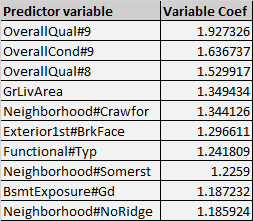


# Subjective Questions

### Question1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Optimal alpha for Ridge model = 8.0
#### Optimal alpha for Lasso model = 0.001

In [63]:
ridge_double_alpha = 16.0
ridge_d = Ridge(alpha=ridge_double_alpha)
ridge_d.fit(X_train, y_train)

y_pred_train = ridge_d.predict(X_train)
y_pred_test = ridge_d.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('ridge_d#r2_train_lr##',r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('ridge_d#r2_test_lr##',r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('ridge_d#rss1_lr##',rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('ridge_d#rss2_lr##',rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('ridge_d#mse_train_lr##',mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('ridge_d#mse_test_lr##',mse_test_lr)
metric4.append(mse_test_lr**0.5)

ridge_comp=pd.DataFrame(lr_table ,columns = ['Metric'])
rg_metric1 = pd.Series(metric2, name = 'Ridge Regression(8.0)')
rg_metric2 = pd.Series(metric4, name = 'Ridge Regression(16.0)')
ridge_comp= pd.concat([ridge_comp, rg_metric1, rg_metric2], axis = 1)
ridge_comp

ridge_d#r2_train_lr## 0.9384838930831099
ridge_d#r2_test_lr## 0.8934567304442804
ridge_d#rss1_lr## 62.807945162144826
ridge_d#rss2_lr## 45.07561324907623
ridge_d#mse_train_lr## 0.061516106916890134
ridge_d#mse_test_lr## 0.10291235901615577


Metric  Ridge Regression(8.0)  Ridge Regression(16.0)
0  R2 Score (Train)               0.944788                0.938484
1   R2 Score (Test)               0.891202                0.893457
2       RSS (Train)              56.371515               62.807945
3        RSS (Test)              46.029516               45.075613
4       MSE (Train)               0.234972                0.248024
5        MSE (Test)               0.324176                0.320800

In [64]:
betas['Ridge_double'] = ridge_d.coef_
ridge_d_coeffs = np.exp(betas['Ridge_double'])
ridge_d_coeffs.sort_values(ascending=False)[:10]

OverallQual#9           1.366305
GrLivArea               1.311168
OverallQual#8           1.278206
OverallCond#9           1.213175
Neighborhood#Crawfor    1.212318
Functional#Typ          1.191169
TotalBsmtSF             1.173744
Exterior1st#BrkFace     1.163299
Neighborhood#Somerst    1.148000
Neighborhood#NoRidge    1.140915
Name: Ridge_double, dtype: float64

In [65]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual#9           1.472521
GrLivArea               1.344647
OverallCond#9           1.325805
OverallQual#8           1.301208
Neighborhood#Crawfor    1.261499
Functional#Typ          1.219009
Exterior1st#BrkFace     1.202558
Neighborhood#NoRidge    1.186365
TotalBsmtSF             1.184958
Neighborhood#Somerst    1.174010
Name: Ridge, dtype: float64

In [66]:
lasso_double_alpha =0.002
lasso_d = Lasso(alpha=lasso_double_alpha)   
lasso_d.fit(X_train, y_train) 

y_pred_train = lasso_d.predict(X_train)
y_pred_test = lasso_d.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('lasso_d_r2_train_lr##',r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('lasso_d_r2_test_lr##',r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('lasso_d_rss1_lr##',rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('lasso_d_rss2_lr##',rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('lasso_d_mse_train_lr##',mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('lasso_d_mse_test_lr##',mse_test_lr)
metric5.append(mse_test_lr**0.5)

lasso_comp=pd.DataFrame(lr_table ,columns = ['Metric'])
ls_metric1 = pd.Series(metric3, name = 'Lasso Regression(0.001)')
ls_metric2 = pd.Series(metric5, name = 'Lasso Regression(0.002)')
lasso_comp= pd.concat([lasso_comp, ls_metric1, ls_metric2], axis = 1)
lasso_comp

lasso_d_r2_train_lr## 0.9333159257446461
lasso_d_r2_test_lr## 0.8884220481085477
lasso_d_rss1_lr## 68.08443981471636
lasso_d_rss2_lr## 47.205652947911986
lasso_d_mse_train_lr## 0.06668407425535393
lasso_d_mse_test_lr## 0.10777546335139723


Metric  Lasso Regression(0.001)  Lasso Regression(0.002)
0  R2 Score (Train)                 0.946970                 0.933316
1   R2 Score (Test)                 0.866429                 0.888422
2       RSS (Train)                54.143170                68.084440
3        RSS (Test)                56.510451                47.205653
4       MSE (Train)                 0.230281                 0.258233
5        MSE (Test)                 0.359193                 0.328292

In [67]:
betas['Lasso_double'] = lasso_d.coef_
lasso_d_coeffs = np.exp(betas['Lasso_double'])
lasso_d_coeffs.sort_values(ascending=False)[:10]

OverallQual#9           2.010569
OverallQual#8           1.601804
OverallCond#9           1.411231
GrLivArea               1.375315
Neighborhood#Crawfor    1.316831
Exterior1st#BrkFace     1.251548
Functional#Typ          1.244309
Neighborhood#Somerst    1.228373
OverallQual#7           1.180440
Neighborhood#NoRidge    1.173666
Name: Lasso_double, dtype: float64

In [68]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual#9           1.927326
OverallCond#9           1.636737
OverallQual#8           1.529917
GrLivArea               1.349434
Neighborhood#Crawfor    1.344126
Exterior1st#BrkFace     1.296611
Functional#Typ          1.241809
Neighborhood#Somerst    1.225900
BsmtExposure#Gd         1.187232
Neighborhood#NoRidge    1.185924
Name: Lasso, dtype: float64

# Question3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [69]:
top_1st_prdict=['OverallQual#9','OverallCond#9','OverallQual#8','GrLivArea','Neighborhood#Crawfor']
top_1st_prdict

['OverallQual#9',
 'OverallCond#9',
 'OverallQual#8',
 'GrLivArea',
 'Neighborhood#Crawfor']

In [70]:
X_train_new=X_train.drop(top_1st_prdict,axis=1)
X_test_new=X_test.drop(top_1st_prdict,axis=1)


In [71]:
X_train_new.shape

(1021, 283)

In [72]:
X_test_new.shape

(438, 283)

In [73]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [75]:
lasso_new_alpha =0.001
lasso_new = Lasso(alpha=lasso_new_alpha)   
lasso_new.fit(X_train_new, y_train) 

y_pred_train = lasso_new.predict(X_train_new)
y_pred_test = lasso_new.predict(X_test_new)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('lasso_new_r2_train_lr##',r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('lasso_new_r2_test_lr##',r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('lasso_new_rss1_lr##',rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('lasso_new_rss2_lr##',rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('lasso_new_mse_train_lr##',mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('lasso_new_mse_test_lr##',mse_test_lr)
metric6.append(mse_test_lr**0.5)

lasso_comp=pd.DataFrame(lr_table ,columns = ['Metric'])
ls_metric1 = pd.Series(metric3, name = 'Lasso Regression(0.001)')
ls_metric2 = pd.Series(metric6, name = 'Lasso new Regression(0.001)')
lasso_comp= pd.concat([lasso_comp, ls_metric1, ls_metric2], axis = 1)
lasso_comp

lasso_new_r2_train_lr## 0.9413316305145826
lasso_new_r2_test_lr## 0.8565743143614907
lasso_new_rss1_lr## 59.90040524461123
lasso_new_rss2_lr## 60.679578942750496
lasso_new_mse_train_lr## 0.05866836948541746
lasso_new_mse_test_lr## 0.1385378514674669


Metric  Lasso Regression(0.001)  Lasso new Regression(0.001)
0  R2 Score (Train)                 0.946970                     0.941332
1   R2 Score (Test)                 0.866429                     0.856574
2       RSS (Train)                54.143170                    59.900405
3        RSS (Test)                56.510451                    60.679579
4       MSE (Train)                 0.230281                     0.242216
5        MSE (Test)                 0.359193                     0.372207

In [76]:
betas1 = pd.DataFrame(index=X_train_new.columns)
betas1.rows = X_train_new.columns
betas1['Lasso_new'] = lasso_new.coef_
betas1
lasso_d_coeffs = np.exp(betas1['Lasso_new'])
lasso_d_coeffs.sort_values(ascending=False)[:10]

2ndFlrSF                1.364334
Exterior1st#BrkFace     1.315712
Functional#Typ          1.231544
1stFlrSF                1.219985
Neighborhood#Somerst    1.186105
TotalBsmtSF             1.173693
PoolQC#NoPool           1.164978
BsmtExposure#Gd         1.154839
GarageQual#Gd           1.132193
BsmtCond#TA             1.118044
Name: Lasso_new, dtype: float64